<span style="font-size: 40px;">Loan Approval Prediction Project</span>

This project aims to determine whether a loan application will be approved or rejected based on several financial as well personal factors, such as CIBIL score and income for a given applicant. This is a supervised learning problem that is specifically a binary classification task where the target variable is loan approval status (loan_status).

The motivation of this project is to determine which features in the dataset influence loan approval outcomes. The goal of this project is to create a model that can classify whether a loan application should be approved or rejected. Such models can lead to modern real-world applications for financial institutions such as banks to expedite the loan approval process.

For this project, I will first perform any necessary data cleaning and then analyze the dataset by doing EDA (Exploratory Data Analysis) to learn about relationships and patterns in the data. I will then build these four models:
1. Logistic Regression
2. Random Forest
3. KNN
4. SVM <br>

I will then train and evaluate these models 3 times (3 iterations):
1. 1st iteration = baseline iteration with default parameters
2. 2nd iteration = hyperparameter tuning to improve performance
3. 3rd iteration = feature selection to simplify the dataset and further improve performance

This dataset came from a Kaggle dataset titled "Loan-Approval-Prediction-Dataset".
Citation: architsharma01. (n.d.). Loan approval prediction dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

<span style="font-size: 20px;">Library Imports for This Project</span>

Before we do anything else, let's first import all the Python libraries we need for this project.

In [2003]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scipy.stats as stats

<span style="font-size: 20px;">Initial Data Exploration</span>

Now, let's load the data into a variable that will store this dataset

In [2004]:
#load data of loan approvals into the pandas objecct as a DataFrame
loan_data =  pd.read_csv("/Users/timchoi/Projects/CSCA-5622-Final-Project/loan_approval_dataset.csv", engine = "python")

Now, we need to start analyzing this data on the surface. Here is some information about the size of the dataset, as well as the column names (the features) and their associated data types

In [2005]:
#let's obtain the number of entries in this dataset
print(f"{len(loan_data)} entries\n") 

#let's get the columns/features
print(f"Columns: {loan_data.columns.to_list()}\n")


#let's get the data types of each column/feature
print("Data Types:")
print(f"{loan_data.dtypes}")

4269 entries

Columns: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

Data Types:
loan_id                        int64
 no_of_dependents            float64
 education                    object
 self_employed                object
 income_annum                  int64
 loan_amount                   int64
 loan_term                     int64
 cibil_score                 float64
 residential_assets_value    float64
 commercial_assets_value     float64
 luxury_assets_value         float64
 bank_asset_value              int64
 loan_status                  object
dtype: object


So, as you can see, there are 4269 entries in total in this dataset. There are a total of 13 columns or features in this dataset. Here is some information about these features:

1. loan_id: (numerical - int) the id of a loan entry
2. no_of_dependents: (numerical - float) number of dependents
3. education: (categorical - string) whether the applicant has graduated from college or not (Graduate if that's the case or Not Graduate otherwise)
4. self_employed: (categorical - string) whether the applicant is self employed or not (Yes for self employed or No otherwise)
5. income_annum: (numerical - int) the amount of income they make per year
6. loan_amount: (numerical - int) the amount of the loan that the applicant is applying for
7. loan_term: (numerical - int) the length of time that the applicant will use the loan
8. residential_assets_value: (numerical - float) the value of the applicant's residence
9. cibil_score: (numerical - float) a credit score that reflect's an applicant's credit history
10. commercial_assets_value: (numerical - float) the value of the assets that the applicant owns
11. luxury_assets_value: (numerical - float) the value of luxury items that the applicant owns
12. bank_asset_value: (numerical - int) the value of liquid assets that the applicant owns in bank accounts
13. loan_status: (categorical - string) whether the loan has been approved or not (Approved if that's the case or Rejected otherwise)  

Now, let's see what the first 5 rows of the dataset look like

In [2006]:
loan_data.head() #get the first 5 rows of the data

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                2.0       Graduate             No        9600000   
1        2                0.0   Not Graduate            Yes        4100000   
2        3                3.0       Graduate             No        9100000   
3        4                3.0       Graduate             No        8200000   
4        5                5.0   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12         778.0                  2400000.0   
1      12200000           8         417.0                  2700000.0   
2      29700000          20         506.0                  7100000.0   
3      30700000           8         467.0                 18200000.0   
4      24200000          20         382.0                 12400000.0   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                17600000.0            22700000.0            8000000   
1                 2200000.0             8800000.0            3300000   
2                 4500000.0            33300000.0           12800000   
3                 3300000.0            23300000.0            7900000   
4                 8200000.0            29400000.0            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

The data looks good but it looks like it is necessary to clean the data, which is what we'll do in the next section

<div style="font-size: 20px;">Data Cleaning</div>

So, let's start cleaning the data. One major reason to clean is the presence of null or empty values in a row in a dataset. Missing values can limit and pose challenges to processing the data as well as utilizing it for model training and testing. Thus, let's check to see if there are any missing values

In [2007]:
print(loan_data.isnull().sum()) # check if there are any missing values in each column/feature by summing the number of null values in each column/feature

loan_id                      0
 no_of_dependents            2
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 2
 residential_assets_value    1
 commercial_assets_value     3
 luxury_assets_value         2
 bank_asset_value            0
 loan_status                 0
dtype: int64


Look's like there are missing values in the dataset. Usually one valid way to address this would be to impute or replace the missing values in the dataset. However, in this case we'll simply drop all the rows with missing values. This is because the rows with missing values make up a very small percentage of all 4269 entries and the missing values are scattered across many features and are not solely tied to one column. Thus, it is safer to drop those entries than to impute them and potentially introduce bias from wrong imputations.

In [2008]:
loan_data.dropna(inplace=True) #drop any entries with missing data 
print(f"{len(loan_data)} entries left")

4259 entries left


Looks like the dropping action worked. It dropped 10 entries in total (from 4269 to 4259), which is accurate since the total number of entries with missing/null values is also 10 if you sum up the counts of all missing values in each column.  

Now, that isn't the only thing that needed to be fixed.  There are several other issues at play:

1. If you look at the list of columns and their respective data types in the previous section, you'll notice that the no_of_dependents data type is float.  I believe that it should not be a float, but rather an int because this factor is usually represented as an int, since you can only have a whole number value of dependents (you can't have half of a dependent for example). So, models that use the dataset may identify this factor as a continuous variable, rather than what it should be: a discrete variable. This may cause models to learn relationships and patterns that are wrong or don't make sense and thus, output results that are not consistent or reasonable to what it should be.

2. cibil_score is also a float. I think it should be an int for the same reason why I think no_of_dependents should be int. Usually, Cibil scores are 3 digit whole numbers (can't have any decimals in them), so it may also cause models to learn incorrect relationships/patterns and output results that don't make sense if cibil_scores are treated as a continuous variable, not a discrete one (which is what it is). 

3. You'll also notice that income_annum, loan_amount, and bank_asset_value are all of type int. I think all 3 should be floats because they are curretly considered as discrete variables (whole numbers). These should be considered continuous variables since the value is not always a whole number (you can have decimals in these kinds of values). Thus, it may cause models to misinterpret these values and learn incorrect relationships and patterns that will show when they output incorrect results.


To solve these 5 potential issues, let's simply convert no_of_dependents and cibil_score both to an int, and then convert loan_amount, income_annum, and bank_asset_value to a float. 

In [2009]:
loan_data[" no_of_dependents"] = loan_data[" no_of_dependents"].astype(int)
loan_data[" cibil_score"] = loan_data[" cibil_score"].astype(int)
loan_data[" loan_amount"] = loan_data[" loan_amount"].astype(float)
loan_data[" income_annum"] = loan_data[" income_annum"].astype(float)
loan_data[" bank_asset_value"] = loan_data[" bank_asset_value"].astype(float) 

print("Data Types:")
print(f"{loan_data.dtypes}")

Data Types:
loan_id                        int64
 no_of_dependents              int64
 education                    object
 self_employed                object
 income_annum                float64
 loan_amount                 float64
 loan_term                     int64
 cibil_score                   int64
 residential_assets_value    float64
 commercial_assets_value     float64
 luxury_assets_value         float64
 bank_asset_value            float64
 loan_status                  object
dtype: object


So it looks like those 2 factors now have different and correct data types. Now, one thing to fix if you see the factors in the dataset is dropping the loan_id column. This column does not provide any meaningful value to use when predicting the status of a loan and it may cause models to learn relationships that are straight up false and don't generalize to new data. Thus, let's simply drop that column.

In [2010]:
loan_data = loan_data.drop('loan_id', axis=1)

print(f"Columns: {loan_data.columns.to_list()}\n")

Columns: [' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']



So it looks like it did remove the loan_id column, as it is not present in the updated list of columns.

Overall, we fixed 5 things to clean our dataset:

1. dropped all entries with missing values
2. changed no_of_dependents to an int type
3. changed cibil_score to an int type
3. changed loan_ammount, incom_annum, and bank_asset_value all to a float type
4. dropped loan_id column

The changes are evident, as you can see below. 

1. There are no missing values for any feature (as the list below shows all missing value counts of 0 for each feature).
2. The features no_of_dependents and cibil_score are now both int type, as seen in the first 5 entries below
3. The features loan_amount, incom_annum, and bank_asset_value are all of type float, as seen in the first 5 entries below.
4. loan_id does not exist in the snapshot of the first 5 entries.

These actions ensure that the data is clean and consistent and is ready for deeper analysis and modeling.

In [2011]:
print("Columns and the number of missing values:")
print(loan_data.isnull().sum())

loan_data.head()

Columns and the number of missing values:
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No     9600000.0   29900000.0   
1                 0   Not Graduate           Yes     4100000.0   12200000.0   
2                 3       Graduate            No     9100000.0   29700000.0   
3                 3       Graduate            No     8200000.0   30700000.0   
4                 5   Not Graduate           Yes     9800000.0   24200000.0   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                 2400000.0               17600000.0   
1          8          417                 2700000.0                2200000.0   
2         20          506                 7100000.0                4500000.0   
3          8          467                18200000.0                3300000.0   
4         20          382                12400000.0                8200000.0   

   luxury_assets_value  bank_asset_value loan_status  
0           22700000.0         8000000.0    Approved  
1            8800000.0         3300000.0    Rejected  
2           33300000.0        12800000.0    Rejected  
3           23300000.0         7900000.0    Rejected  
4           29400000.0         5000000.0    Rejected

Also, one more thing, the names of the columns all start with a space. It's not an issue, but for simpler use of these columns, let's remove the space in front of each column name

In [2012]:
loan_data.columns = loan_data.columns.str.strip()
print(loan_data.columns.tolist())

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


<span style="font-size: 20px;">Exploratory Data Analysis (EDA)</span>

In this section, we'll perform a exploratory data analysis (EDA) to further understand the nature of the data, as well as finding patterns and relationships that could be key in setting up models and eventually training and testing them. Based on the information about the dataset, out of the 12 features, the feature loan_status will be considered the target feature since it stores whether a loan is approved or not, which is what we're predicting. Let's use this information to analyze the data.

To start, let's first visualize the relationship between each feature that is not the target feature and is numerical and the target feature (which is loan_status) by creating histograms for each relationship. In addition to that, for each histogram graph, there is also some statistical information such as mean, stdev and the skewness of the graph, as well as the results of the Shapiro-Wilk statistical test. This test is a statistical test that determines whether data is normally distributed with the null hypothesis that the data is derived from a normally distributed popultion. Thus, any resulting p-value above 0.05 indicates the data is normally distributed, and anything that doesn't meet this condition is not normally distributed.

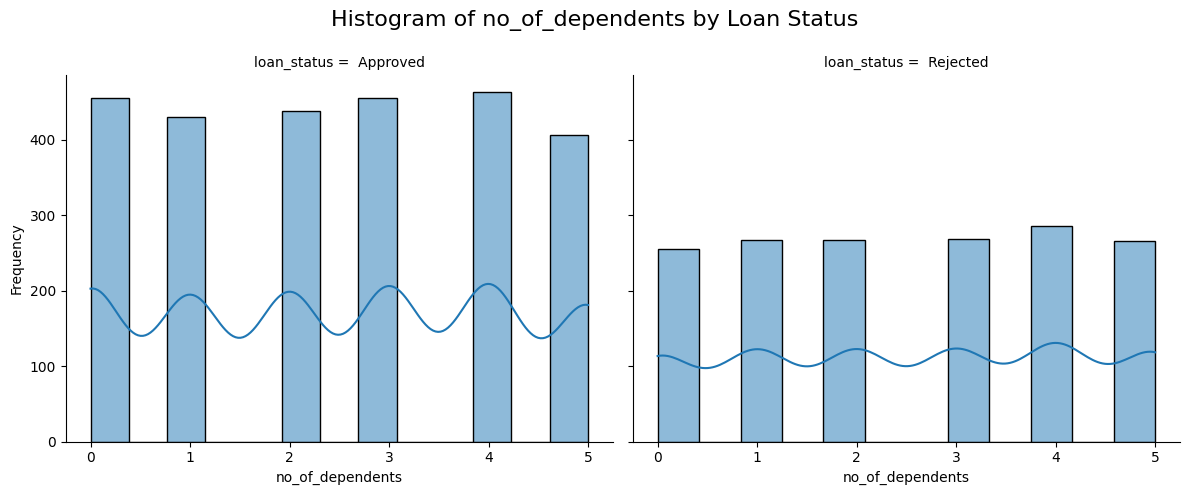

Descriptive Statistics for no_of_dependents:

count    4259.000000
mean        2.497535
std         1.696481
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: no_of_dependents, dtype: float64

Skewness: -0.02, Kurtosis: -1.26

Shapiro-Wilk Test: Statistic = 0.908, p-value = 0.000


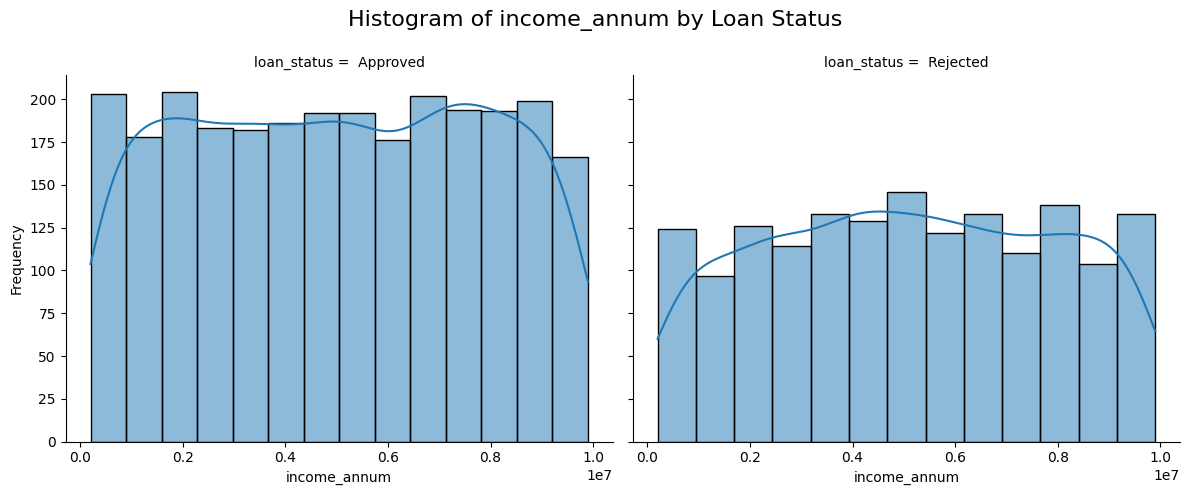

Descriptive Statistics for income_annum:

count    4.259000e+03
mean     5.057384e+06
std      2.806551e+06
min      2.000000e+05
25%      2.650000e+06
50%      5.100000e+06
75%      7.500000e+06
max      9.900000e+06
Name: income_annum, dtype: float64

Skewness: -0.01, Kurtosis: -1.18

Shapiro-Wilk Test: Statistic = 0.956, p-value = 0.000


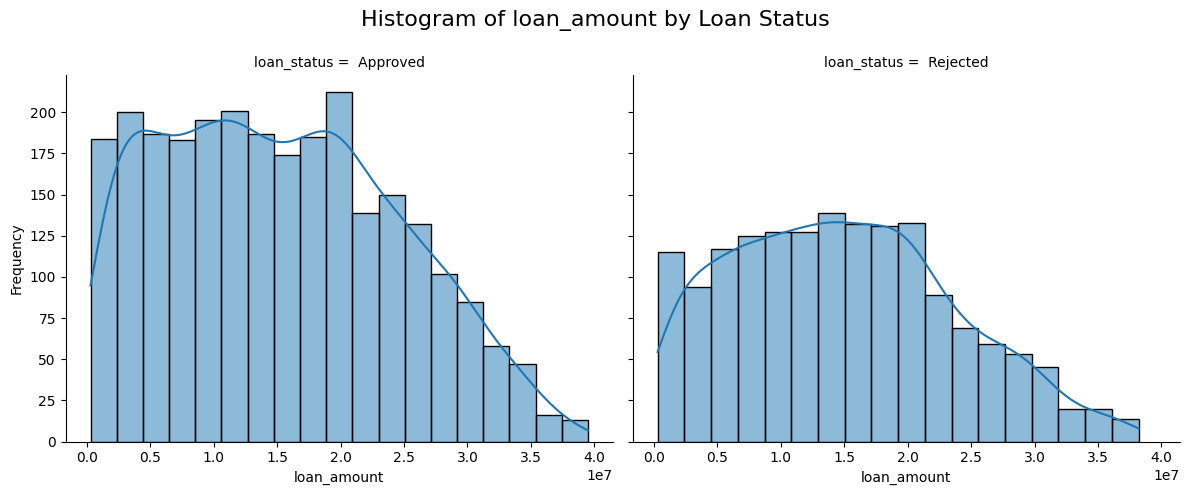

Descriptive Statistics for loan_amount:

count    4.259000e+03
mean     1.512656e+07
std      9.038682e+06
min      3.000000e+05
25%      7.700000e+06
50%      1.450000e+07
75%      2.140000e+07
max      3.950000e+07
Name: loan_amount, dtype: float64

Skewness: 0.31, Kurtosis: -0.74

Shapiro-Wilk Test: Statistic = 0.972, p-value = 0.000


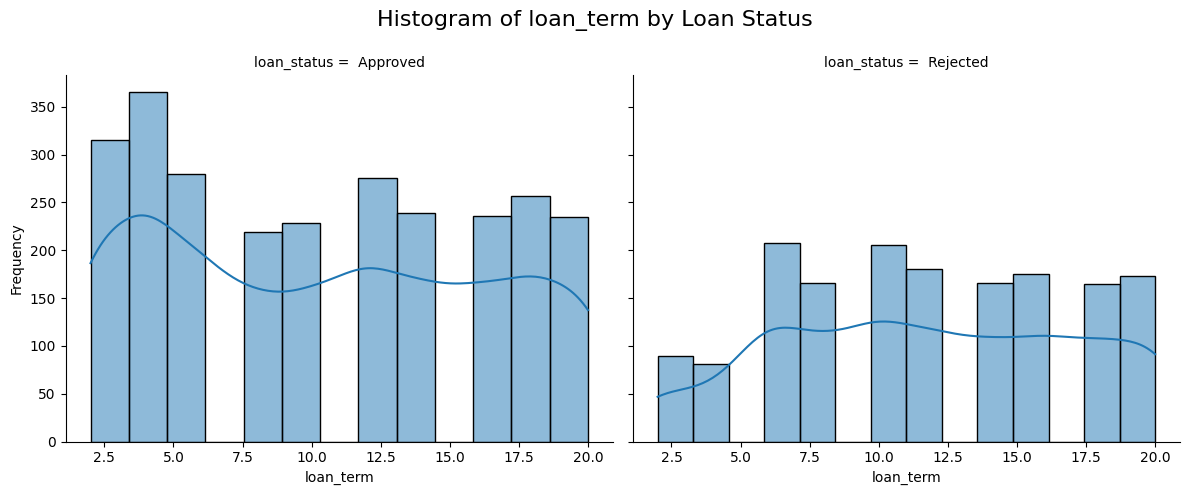

Descriptive Statistics for loan_term:

count    4259.000000
mean       10.897863
std         5.708073
min         2.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        20.000000
Name: loan_term, dtype: float64

Skewness: 0.04, Kurtosis: -1.22

Shapiro-Wilk Test: Statistic = 0.936, p-value = 0.000


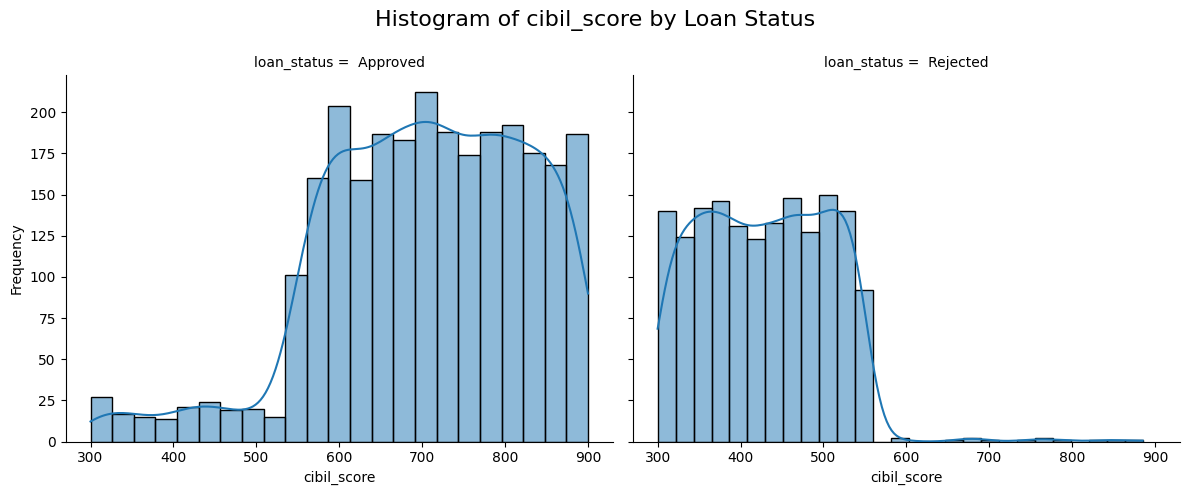

Descriptive Statistics for cibil_score:

count    4259.000000
mean      599.983095
std       172.335352
min       300.000000
25%       454.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64

Skewness: -0.01, Kurtosis: -1.18

Shapiro-Wilk Test: Statistic = 0.957, p-value = 0.000


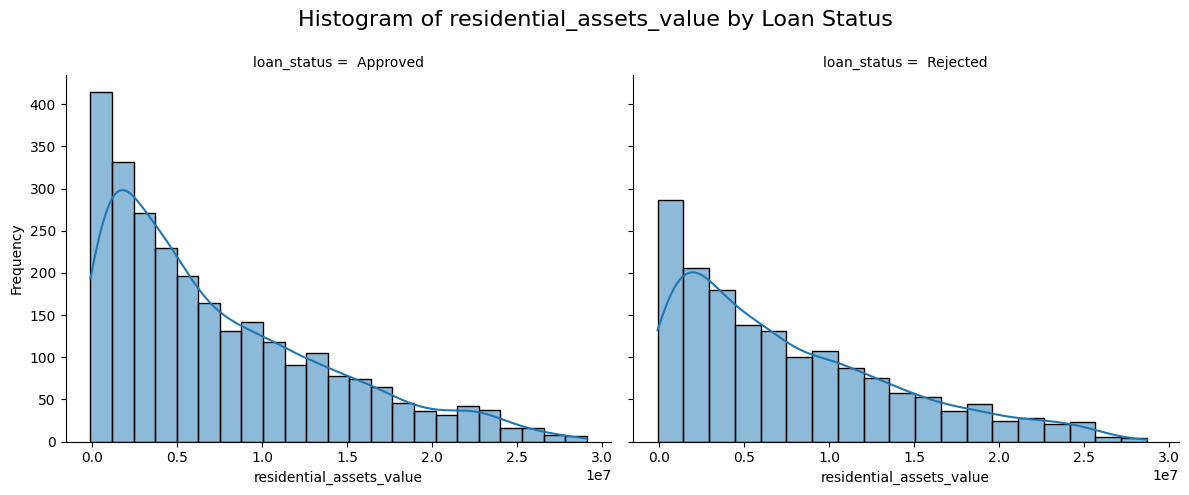

Descriptive Statistics for residential_assets_value:

count    4.259000e+03
mean     7.475558e+06
std      6.505691e+06
min     -1.000000e+05
25%      2.200000e+06
50%      5.600000e+06
75%      1.130000e+07
max      2.910000e+07
Name: residential_assets_value, dtype: float64

Skewness: 0.98, Kurtosis: 0.18

Shapiro-Wilk Test: Statistic = 0.899, p-value = 0.000


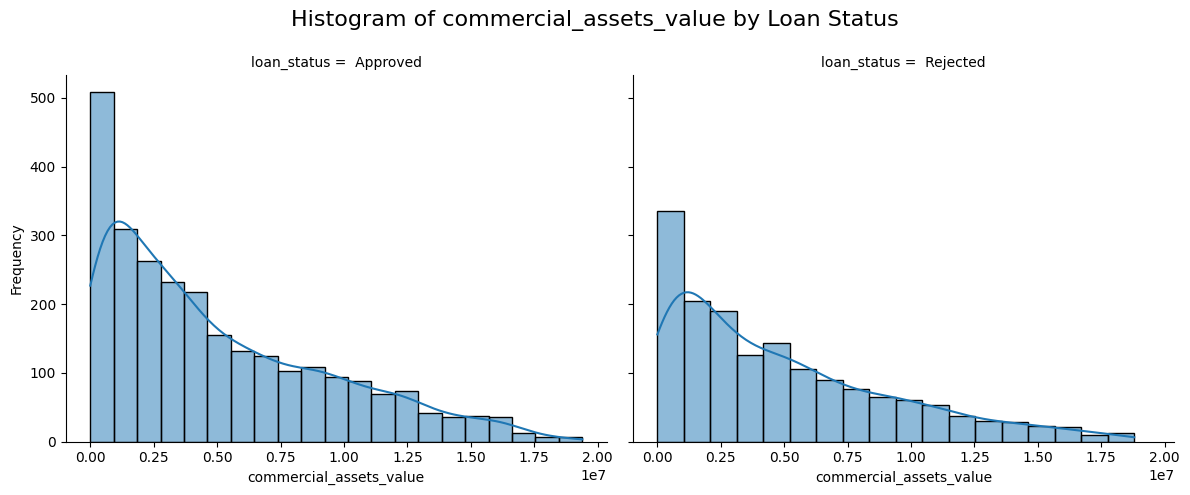

Descriptive Statistics for commercial_assets_value:

count    4.259000e+03
mean     4.975886e+06
std      4.391188e+06
min      0.000000e+00
25%      1.300000e+06
50%      3.700000e+06
75%      7.600000e+06
max      1.940000e+07
Name: commercial_assets_value, dtype: float64

Skewness: 0.96, Kurtosis: 0.10

Shapiro-Wilk Test: Statistic = 0.898, p-value = 0.000


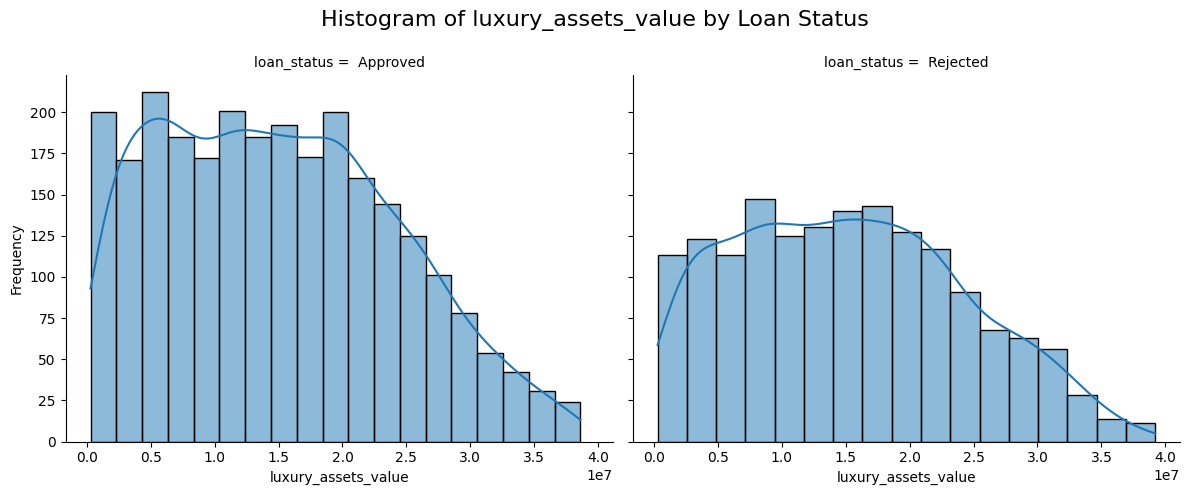

Descriptive Statistics for luxury_assets_value:

count    4.259000e+03
mean     1.512019e+07
std      9.100047e+06
min      3.000000e+05
25%      7.500000e+06
50%      1.460000e+07
75%      2.170000e+07
max      3.920000e+07
Name: luxury_assets_value, dtype: float64

Skewness: 0.32, Kurtosis: -0.74

Shapiro-Wilk Test: Statistic = 0.971, p-value = 0.000


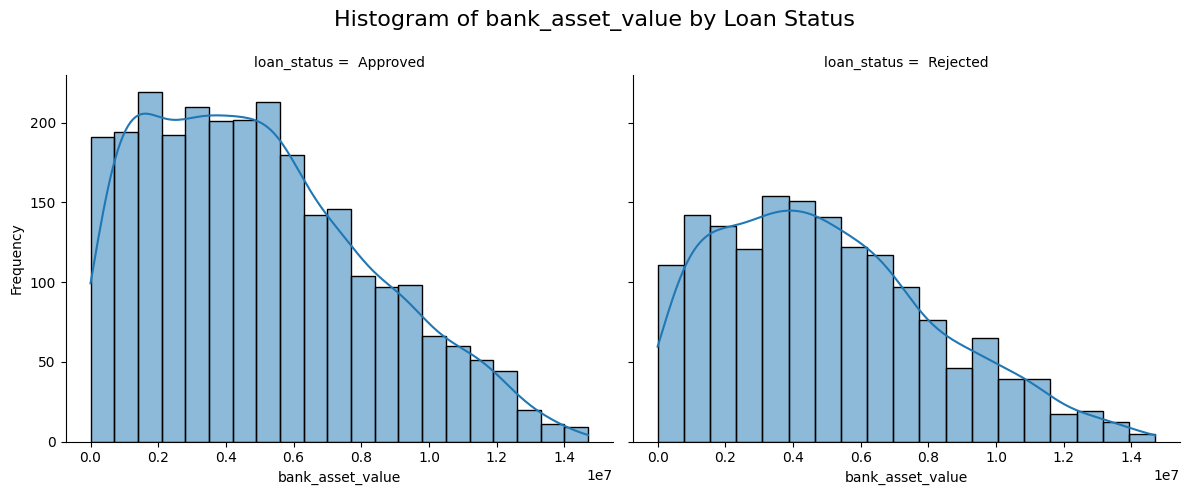

Descriptive Statistics for bank_asset_value:

count    4.259000e+03
mean     4.975792e+06
std      3.250589e+06
min      0.000000e+00
25%      2.300000e+06
50%      4.600000e+06
75%      7.100000e+06
max      1.470000e+07
Name: bank_asset_value, dtype: float64

Skewness: 0.56, Kurtosis: -0.40

Shapiro-Wilk Test: Statistic = 0.960, p-value = 0.000


In [2013]:
for col in loan_data.select_dtypes(include=['int64', 'float64']):
    g = sns.FacetGrid(loan_data, col='loan_status', height=5, aspect=1.2)
    g.map(sns.histplot, col, kde=True)  
    g.set_axis_labels(col, 'Frequency')
    g.fig.suptitle(f'Histogram of {col} by Loan Status', fontsize=16)  
    g.tight_layout()  
    g.fig.subplots_adjust(top=0.85)  
    plt.show()

    print(f"Descriptive Statistics for {col}:\n")
    print(loan_data[col].describe())

    print(f"\nSkewness: {loan_data[col].skew():.2f}, Kurtosis: {loan_data[col].kurt():.2f}") 

    shapiro_stat, shapiro_p = stats.shapiro(loan_data[col])
    print(f"\nShapiro-Wilk Test: Statistic = {shapiro_stat:.3f}, p-value = {shapiro_p:.3f}") 

Looking at these graphs, one thing we notice is that almost all histogram graphs has roughly the same shape. The only one graph that's not the case is the graph between cibil_score and loan_status. Unlike the other graphs that are right skewed, these ones are the opposite. Loans that are rejected based on the cibil_score are right skewed but the loans that are approved based on a cibil_score on the right are left skewed. This indicates that there is a huge and likely the greatest difference in value distribution when you compare the graphs for accepted and rejected loans based on the a given numerical factor out of all the graphs. This large difference could indicate that cibil_score is a very important and strong predictor in our models.

Looking at it quantitatively, I notice that for each graph, the p-value found for the stats test for each relationship was 0.0, which indicates that the data is not normally distributed and that makes sense given that all the histogram graphs show a skewness away from the center of the graph. Also, the fact that most graphs display right skewness indicates that there may be some outliers that we may need to remove before our model selection.

Now, lets look at violin plots of the same relationship that we visualized with the histograms. Violin plots are similar to histograms in that they both depict the shape of the data set. However, unlike histograms, violin plots use density plots to capture the shape of the data. This is why these plots have a smooth bandwidth appearance and not a box appearance like in histograms. Violin plots give us a different perspective on how the data is distributed.  In addition to illustrating these same relationships with violin plots, we will also showcase for each plot some statistics about each relationship as well as the results of another statistical test, the Mann-Whitney U test.  This test compares 2 groups of data and determines whether their distributions are significantly different from each other. The two groups of data in each plot represent the values of the input feature when the loan is approved and when the loan is rejected. The null hypothesis is that both groups are not significantly different. 

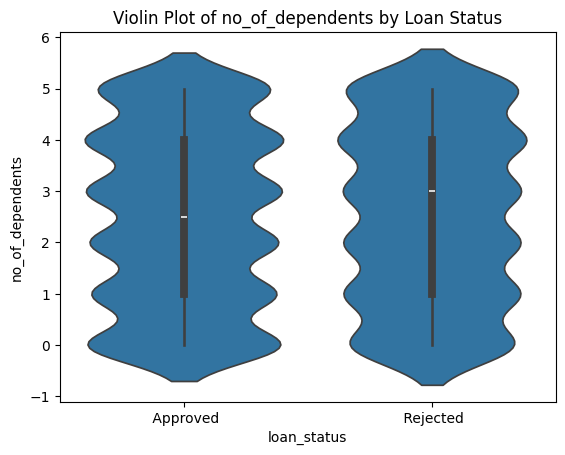

Descriptive Statistics for no_of_dependents:

              count      mean       std  min  25%  50%  75%  max
loan_status                                                     
Approved     2650.0  2.474717  1.695909  0.0  1.0  2.5  4.0  5.0
Rejected     1609.0  2.535115  1.697281  0.0  1.0  3.0  4.0  5.0


Mann-Whitney U test for no_of_dependents: U-statistic = 2088703.500, p-value = 0.260


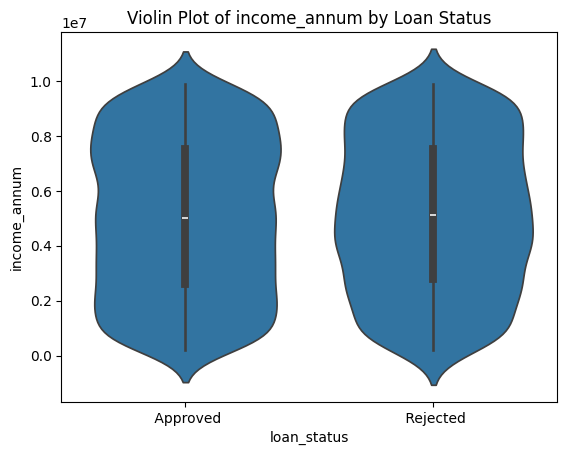

Descriptive Statistics for income_annum:

              count          mean           std       min        25%  \
loan_status                                                            
Approved     2650.0  5.025547e+06  2.828117e+06  200000.0  2600000.0   
Rejected     1609.0  5.109820e+06  2.770743e+06  200000.0  2800000.0   

                   50%        75%        max  
loan_status                                   
Approved     5000000.0  7500000.0  9900000.0  
Rejected     5100000.0  7500000.0  9900000.0  


Mann-Whitney U test for income_annum: U-statistic = 2095306.500, p-value = 0.347


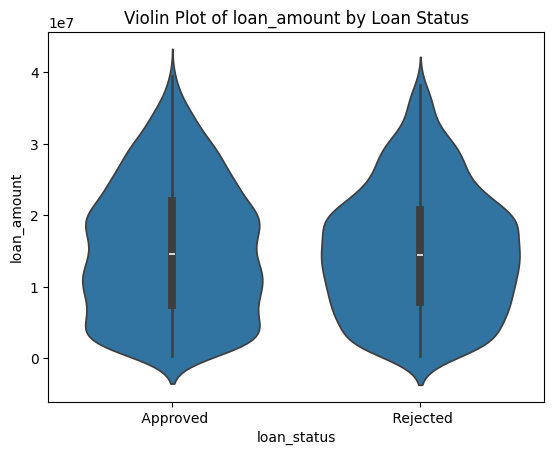

Descriptive Statistics for loan_amount:

              count          mean           std       min        25%  \
loan_status                                                            
Approved     2650.0  1.524755e+07  9.223848e+06  300000.0  7500000.0   
Rejected     1609.0  1.492728e+07  8.724329e+06  300000.0  7900000.0   

                    50%         75%         max  
loan_status                                      
Approved     14600000.0  22075000.0  39500000.0  
Rejected     14500000.0  20800000.0  38200000.0  


Mann-Whitney U test for loan_amount: U-statistic = 2166020.000, p-value = 0.381


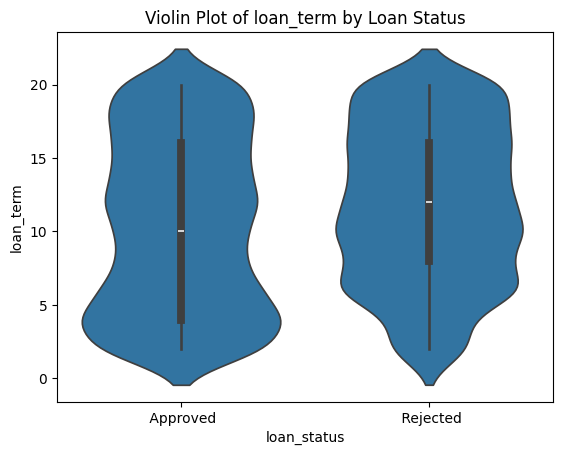

Descriptive Statistics for loan_term:

              count       mean       std  min  25%   50%   75%   max
loan_status                                                         
Approved     2650.0  10.400755  5.880475  2.0  4.0  10.0  16.0  20.0
Rejected     1609.0  11.716594  5.313479  2.0  8.0  12.0  16.0  20.0


Mann-Whitney U test for loan_term: U-statistic = 1845370.000, p-value = 0.000


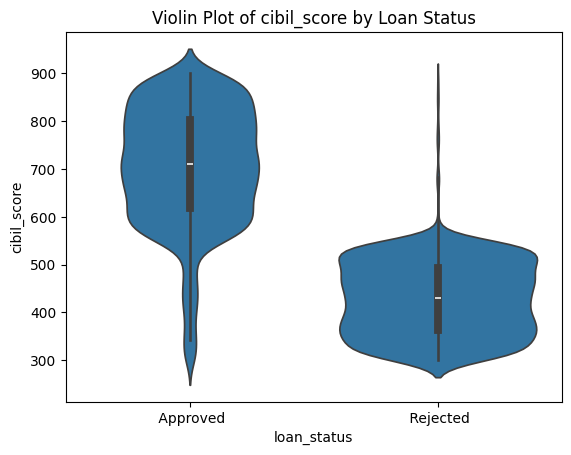

Descriptive Statistics for cibil_score:

              count        mean         std    min    25%    50%    75%    max
loan_status                                                                   
Approved     2650.0  703.449057  125.141806  300.0  618.0  711.0  803.0  900.0
Rejected     1609.0  429.576134   78.401223  300.0  364.0  429.0  493.0  885.0


Mann-Whitney U test for cibil_score: U-statistic = 4091551.500, p-value = 0.000


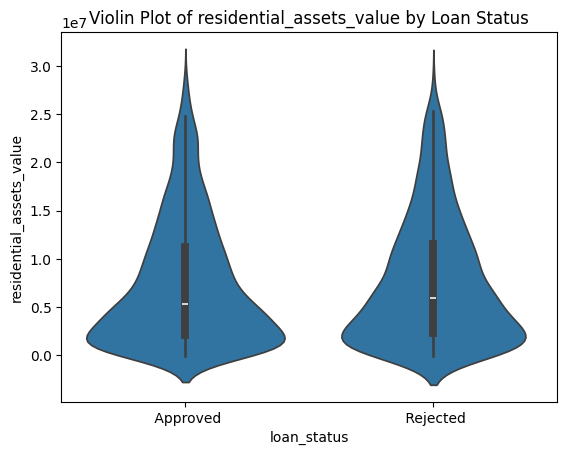

Descriptive Statistics for residential_assets_value:

              count          mean           std       min        25%  \
loan_status                                                            
Approved     2650.0  7.398981e+06  6.502346e+06 -100000.0  2100000.0   
Rejected     1609.0  7.601678e+06  6.511253e+06 -100000.0  2300000.0   

                   50%         75%         max  
loan_status                                     
Approved     5350000.0  11200000.0  29100000.0  
Rejected     5900000.0  11500000.0  28700000.0  


Mann-Whitney U test for residential_assets_value: U-statistic = 2088215.500, p-value = 0.261


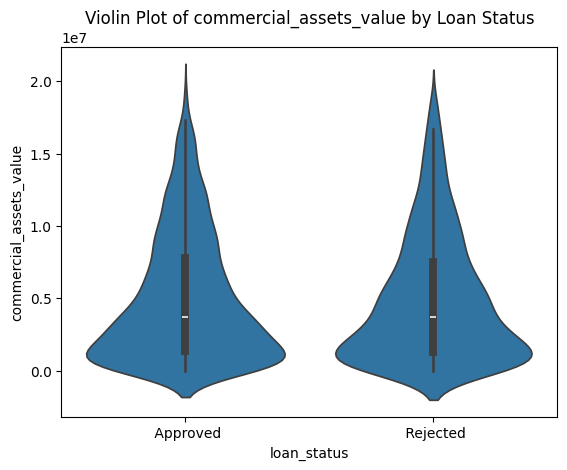

Descriptive Statistics for commercial_assets_value:

              count          mean           std  min        25%        50%  \
loan_status                                                                  
Approved     2650.0  5.004377e+06  4.392837e+06  0.0  1400000.0  3700000.0   
Rejected     1609.0  4.928962e+06  4.389434e+06  0.0  1300000.0  3700000.0   

                   75%         max  
loan_status                         
Approved     7800000.0  19400000.0  
Rejected     7500000.0  18800000.0  


Mann-Whitney U test for commercial_assets_value: U-statistic = 2155107.500, p-value = 0.551


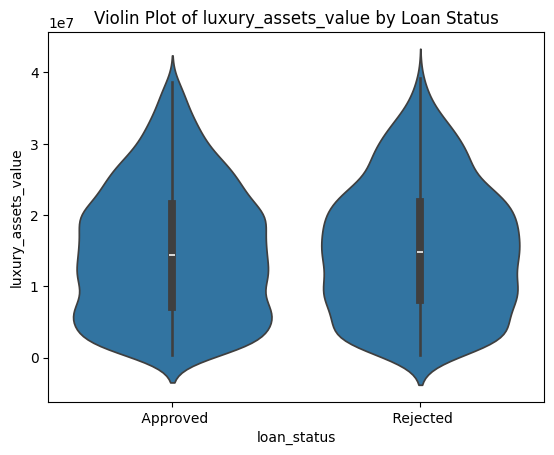

Descriptive Statistics for luxury_assets_value:

              count          mean           std       min        25%  \
loan_status                                                            
Approved     2650.0  1.501128e+07  9.154512e+06  300000.0  7100000.0   
Rejected     1609.0  1.529956e+07  9.009590e+06  300000.0  8100000.0   

                    50%         75%         max  
loan_status                                      
Approved     14400000.0  21600000.0  38600000.0  
Rejected     14800000.0  21800000.0  39200000.0  


Mann-Whitney U test for luxury_assets_value: U-statistic = 2088023.500, p-value = 0.259


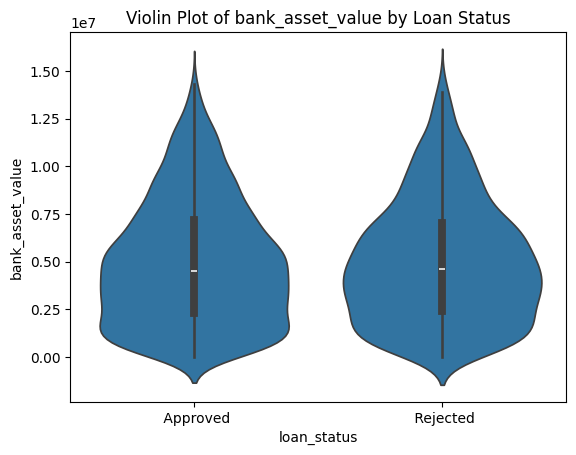

Descriptive Statistics for bank_asset_value:

              count          mean           std  min        25%        50%  \
loan_status                                                                  
Approved     2650.0  4.959623e+06  3.275439e+06  0.0  2300000.0  4500000.0   
Rejected     1609.0  5.002424e+06  3.210078e+06  0.0  2400000.0  4600000.0   

                   75%         max  
loan_status                         
Approved     7200000.0  14700000.0  
Rejected     7000000.0  14700000.0  


Mann-Whitney U test for bank_asset_value: U-statistic = 2107308.000, p-value = 0.527


In [2014]:

for col in loan_data.select_dtypes(include=['float64', 'int64']):
    plt.figure()
    sns.violinplot(data=loan_data, x='loan_status', y=col)
    plt.title(f'Violin Plot of {col} by Loan Status')
    plt.show()

    print(f"Descriptive Statistics for {col}:\n")

    print(loan_data.groupby('loan_status')[col].describe())
    print("\n")

    u_stat, p_value = stats.mannwhitneyu(loan_data[loan_data["loan_status"] == loan_data["loan_status"].unique()[0]][col], loan_data[loan_data["loan_status"] == loan_data["loan_status"].unique()[1]][col])

    print(f"Mann-Whitney U test for {col}: U-statistic = {u_stat:.3f}, p-value = {p_value:.3f}")


Looking at these violin plots and their associated data and the stats tests, we can see that while most plots have graphs that are roughly similar to each other, there are 2 plots that stand out: the plot between loan approval and cibil_score and the plot between loan approval and loan_term.  The first plot, the plot between loan approval and loan term includes 2 shapes that look quite different from each other, unlike the 7 other plots with graphs that essentially have the same shape as each other. The Approved graph has a much wider distribution in the lower values of loan_term than in the rejected graph, which has a more wider distribution for higher values of long_term. This means that loans are likely approved with shorter loan_terms and more likely to be rejected with longer loan_terms.  For the other plot (cibil_score vs loan_status), the graphs in the plot are completely different. The approved graph has a very wide distribution with higher values of cibil score (and very thin distribution for lower values) while the rejected graph has a very wide distribution with lower values of cibil_score (and very thin distribution for higher values).  This also suggests that higher values of cibil_score likely lead to approval, while lower scores likely lead to rejection. So, these 2 variables, especially cibil_score, are likely very strong predictors for our models. And this makes sense, given that when you looks at the results of the stats test for each plot, you will see that only loan_term and cibil_score have a p value of 0.00. This, unlike the rest of the variables that have significantly high p values greater than 0.05, means that they are the only factors that are statistically significant. Thus, we should keep an eye out for loan_term and more importantly, cibil_score, as they seem to significantly influence loan approval.

Now, let's analyze a heatmap and pairplot of a correlation matrix of all the features.

/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/4249827340.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data_copy['loan_status'] = loan_data_copy['loan_status'].replace({


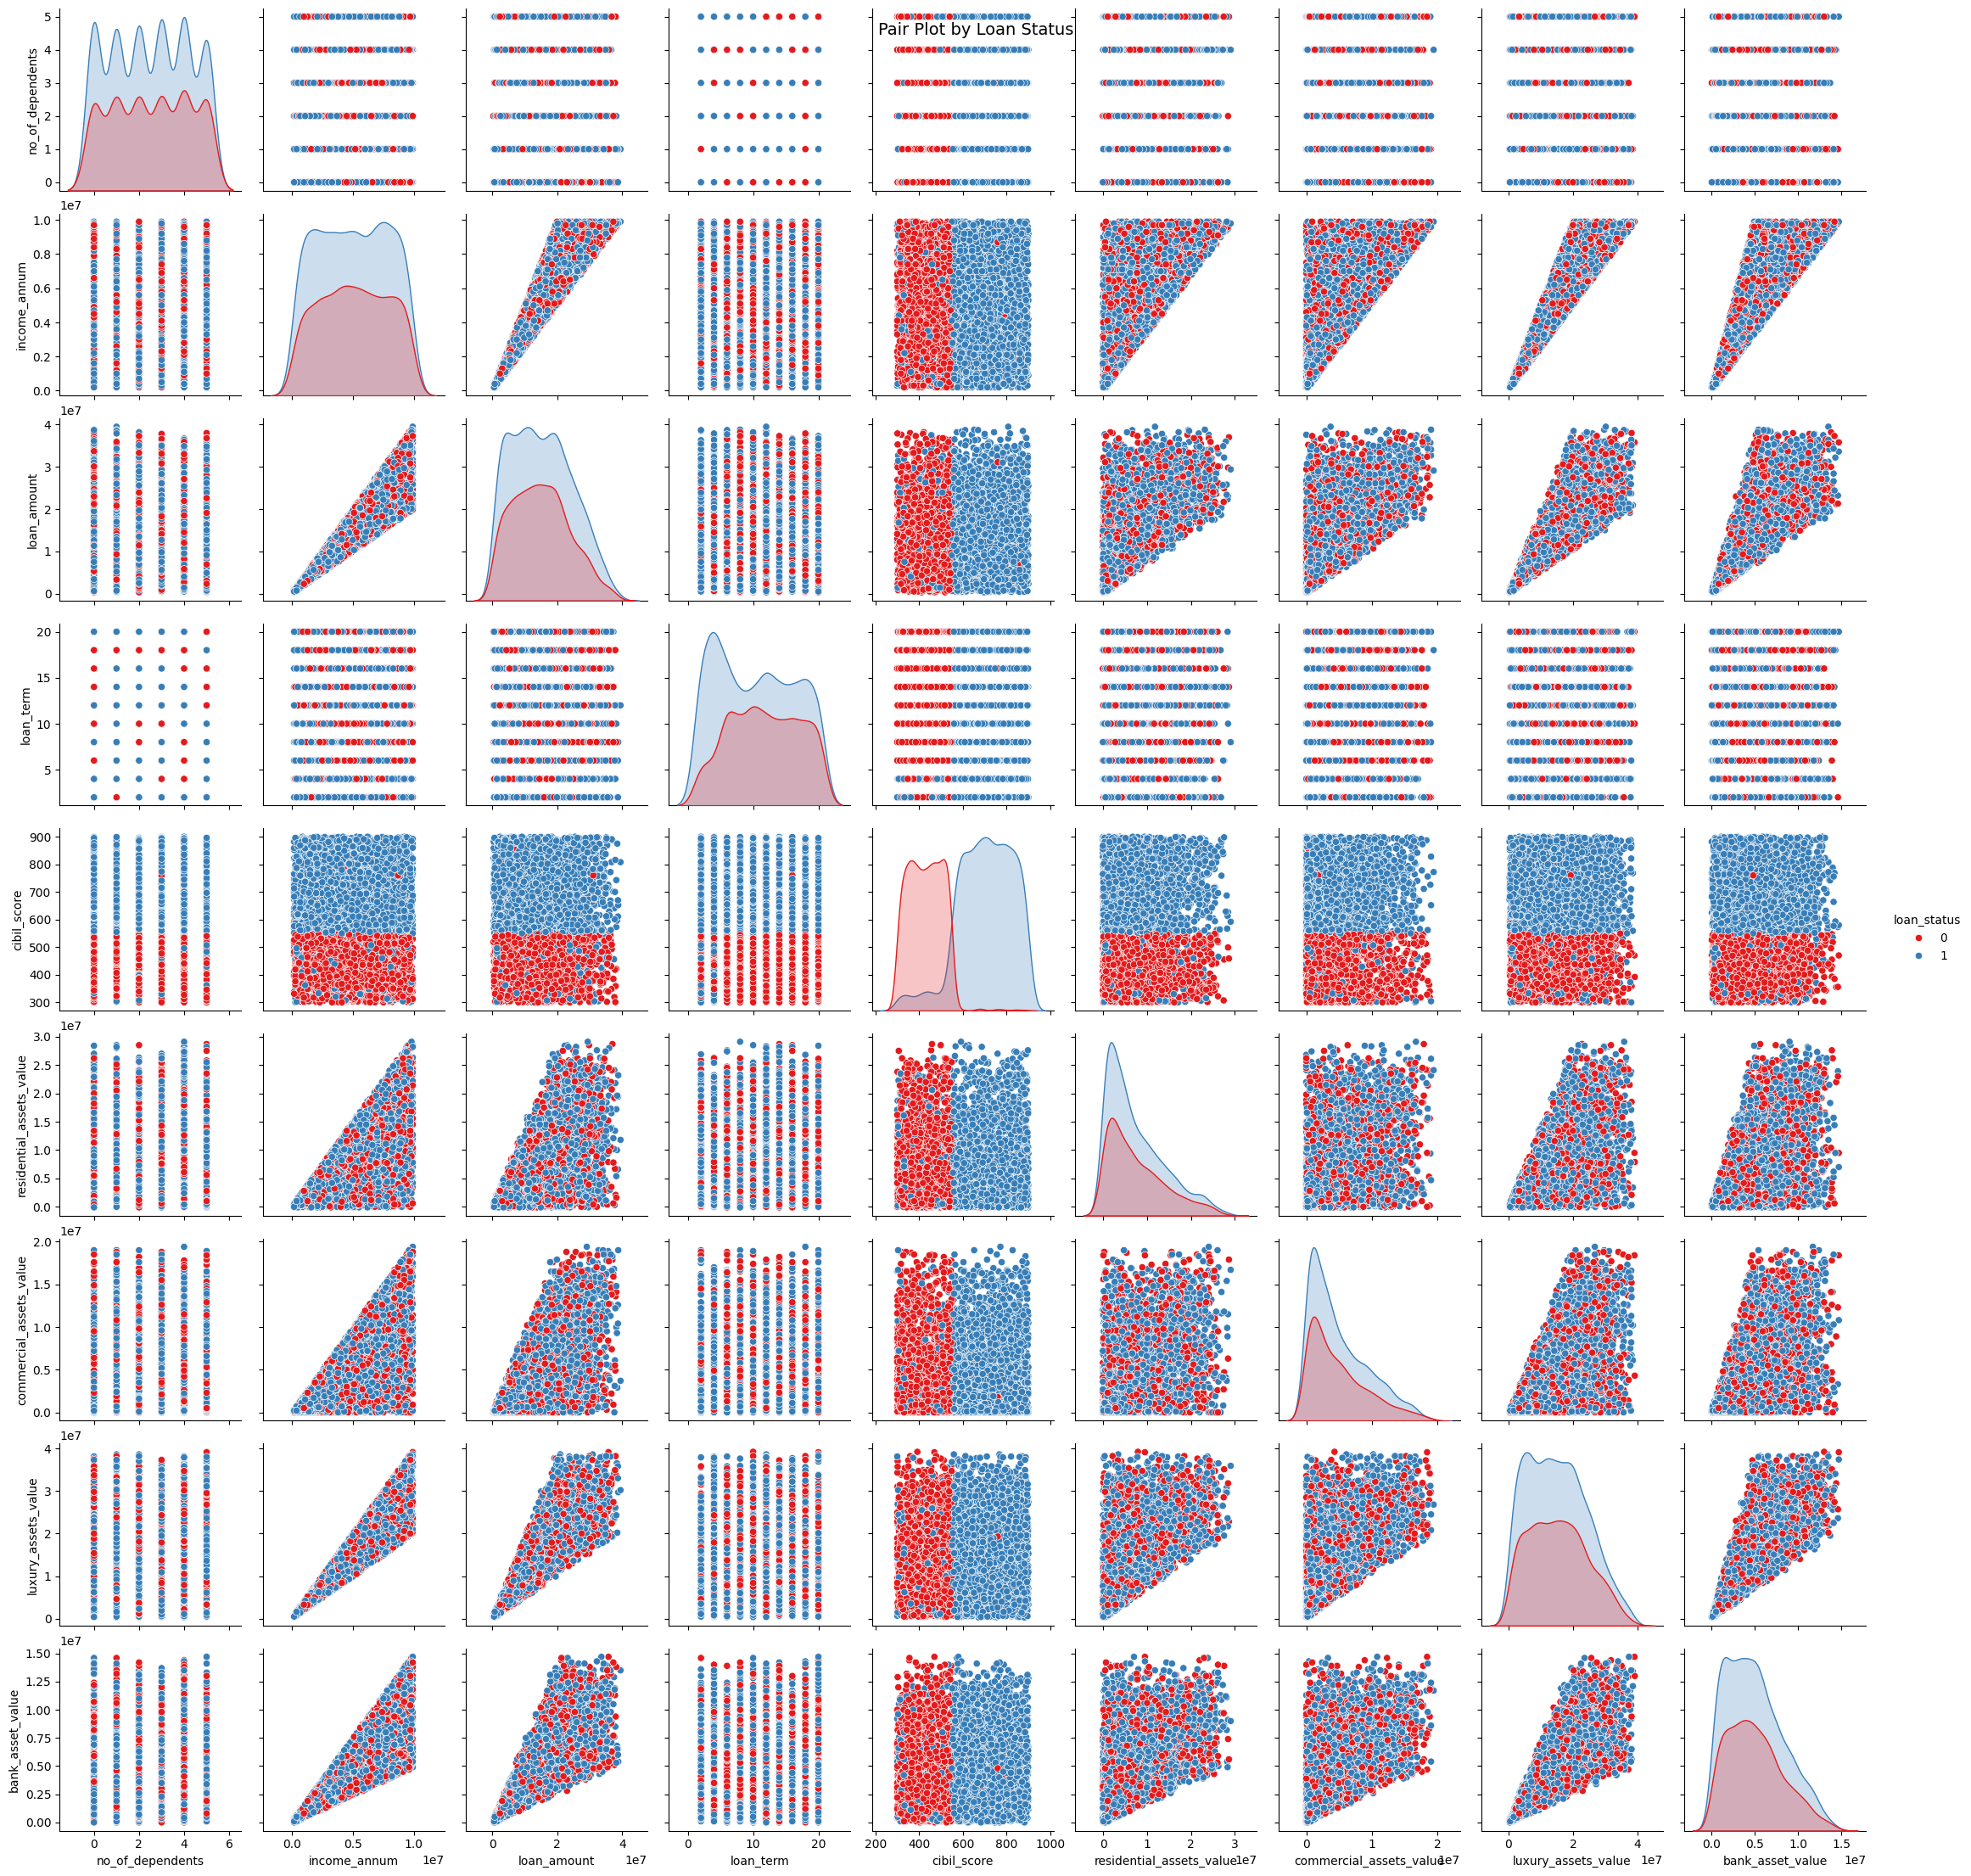

Spearman's Rank Correlation Matrix:
                           no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  residential_assets_value  commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status
no_of_dependents                  1.000000      0.007713    -0.000907  -0.020324    -0.009048                  0.012739                 0.004006             0.005319          0.012994    -0.017267
income_annum                      0.007713      1.000000     0.941247   0.011213    -0.022619                  0.638726                 0.644956             0.943014          0.879552    -0.014425
loan_amount                      -0.000907      0.941247     1.000000   0.011075    -0.019600                  0.614231                 0.623572             0.894232          0.839865     0.013430
loan_term                        -0.020324      0.011213     0.011075   1.000000     0.008775                  0.002820                -0.001450             0.008833          

In [2015]:
loan_data_copy = loan_data.copy() # create a copy of the original DataFrame

loan_data_copy['loan_status'] = loan_data_copy['loan_status'].astype(str).str.strip().str.lower() #convert loan_status feature to string, strip whitespace, and convert to lowercase for simplicity

loan_data_copy['loan_status'] = loan_data_copy['loan_status'].replace({
    'approved': 1,
    'rejected': 0
}).infer_objects() #convert the loan_status feature to numeric values (1 for approved, 0 for rejected) because the model requires numeric values so that we can use it as a target variable

loan_data_copy = loan_data_copy.dropna(subset=['loan_status'])  #drop the original loan_status column since it's a categorial feature and we can't use categorical features in the model

cols = loan_data_copy.select_dtypes(include=['int64', 'float64'])

cols['loan_status'] = loan_data_copy['loan_status']
sns.pairplot(cols, hue='loan_status', diag_kind='kde', palette='Set1')
plt.suptitle('Pair Plot by Loan Status', fontsize=14)
plt.show()

correlation_matrix = loan_data_copy.select_dtypes(include=['int64', 'float64']).corr(method='spearman')
print("Spearman's Rank Correlation Matrix:\n", correlation_matrix.to_string())

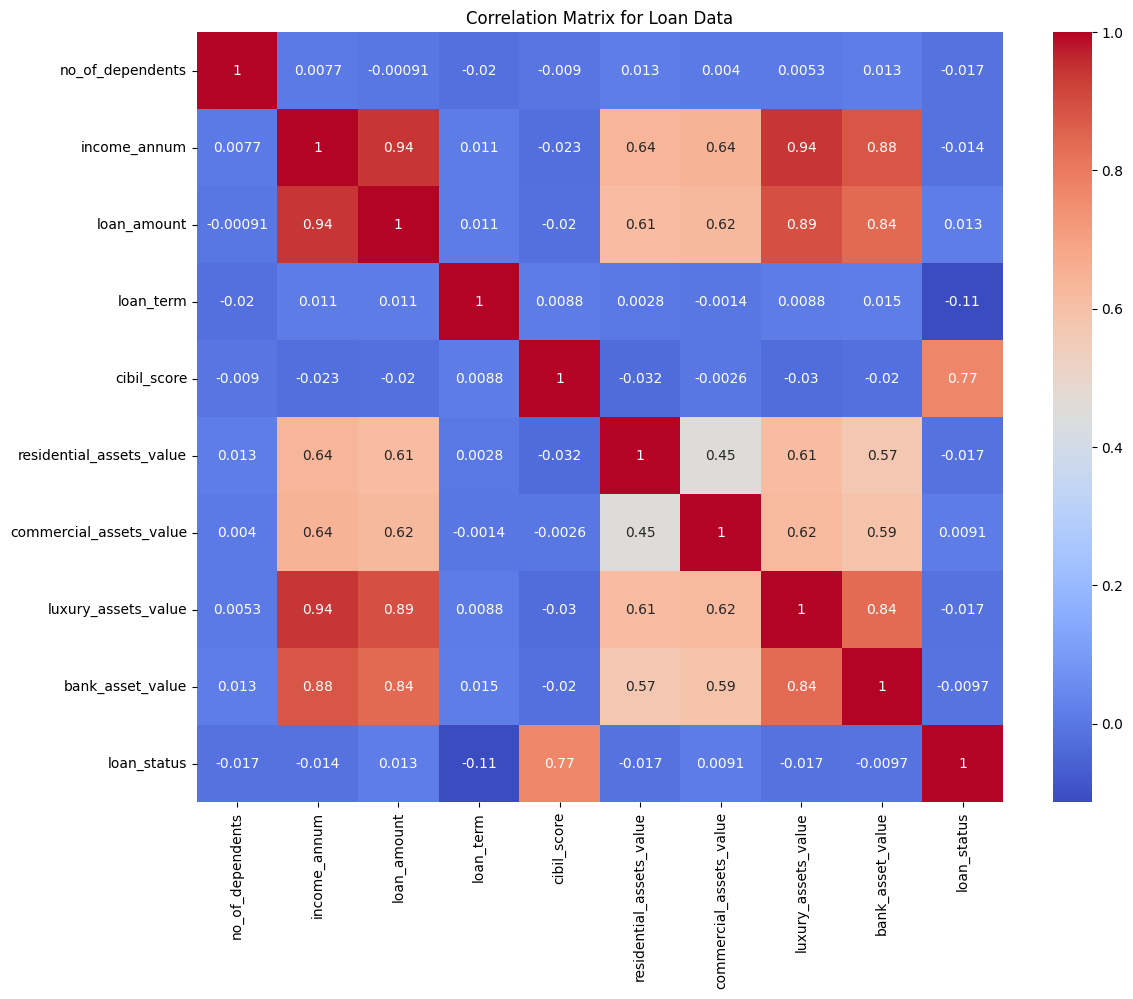

In [2016]:
cor = loan_data_copy.select_dtypes(include = ['int64', 'float64']).corr(method='spearman')
plt.figure(figsize=(13, 10))
sns.heatmap(cor, cmap = 'coolwarm', annot = True)
plt.title('Correlation Matrix for Loan Data')
plt.show()

So, looking at the Spearman's rank correlation matrix values and this heatmap, we can clearly see the following:

1. cibil_score has the strongest correlation value with loan_status (our target feature) with a value of 0.77. This means that higher credit scores are associated with better outcomes in terms of loan approval, which is what we've suspected previously. 

2. Similarly, there are also several features that are highly correlated with each other not including the target feature. For example, loan_amount and income_annum have one of the highest correlation values of 0.94. You can figure that out by seeing the color of the cells, as cells that are hotter (becoming more red) suggest that the features of that cells are more correlated with each other.  This indicates that there may be multi-collinearity in the dataset, which is what we want to avoid. This also means that such features provide very similar information, and are therefore redundant. 

We clearly saw observation #1 in our previous visualizations, so this confirms our beliefs that cibil_score is the most important feature for loan approval. However, for the 2nd observation, we noticed that there were several features that were highly correlated with each other, indicating that multi-collinearity may be present in the dataset. The problem with multi-collinearity is that it may cause overfitting when training our models. Thus, we will probably have to remove such features from the dataset at some point during our model training.

So far, we've analyzed only the numerical features of this dataset. We haven't analyzed the categorial features, which are education and self_employed, in relation to our target feature, loan_status. So let's take a look at that.

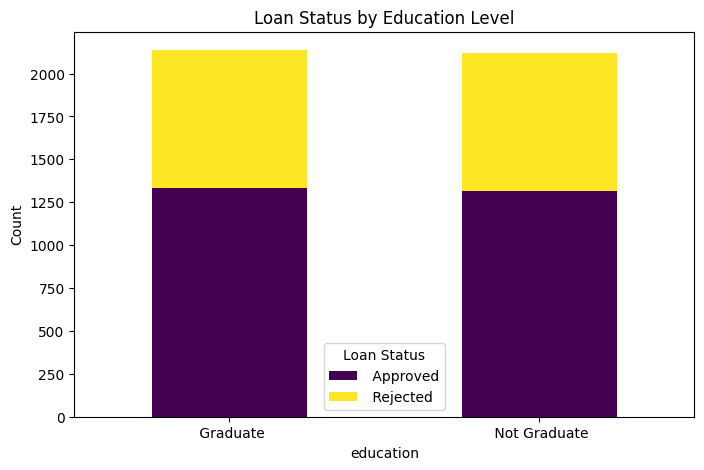

education     loan_status
Graduate      Approved       1334
              Rejected        803
Not Graduate  Approved       1316
              Rejected        806
Name: count, dtype: int64


Chi-square test for education and loan_status:
Chi-square statistic: 0.059
P-value: 0.809


In [2017]:

loan_data.groupby(['education', 'loan_status']).size().unstack().plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Loan Status by Education Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.show()

print(loan_data.groupby("education")["loan_status"].value_counts())
print("\n")

contingency_table = pd.crosstab(loan_data['education'], loan_data['loan_status'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for education and loan_status:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")


We can clearly see that the numbers for applicants who were approved were almost identical, as well as numbers for applicants who were rejected, which is why the bars for Grade and Not Graduate are almost identical in terms of proportions of loan_status in both bars. But what's more telling is that when we conduct a Chi-square test on this relationship, we see that the resulting p-value is 0.8, which is far greater than the threshold value of 0.05.  This indicates that education is not statistically significant, and therefore really has no impact on loan approval.   

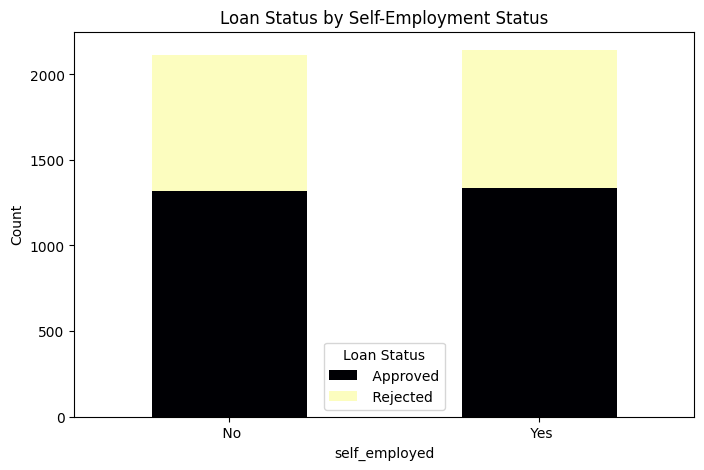

self_employed  loan_status
No             Approved       1316
               Rejected        800
Yes            Approved       1334
               Rejected        809
Name: count, dtype: int64


Chi-square test for education and loan_status:
Chi-square statistic: 0.000
P-value: 0.995


In [2018]:

loan_data.groupby(['self_employed', 'loan_status']).size().unstack().plot(kind='bar', stacked=True, figsize=(8, 5), colormap='magma')
plt.title('Loan Status by Self-Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.show()

print(loan_data.groupby("self_employed")["loan_status"].value_counts())
print("\n")

contingency_table = pd.crosstab(loan_data['self_employed'], loan_data['loan_status'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for education and loan_status:")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

You can see that like the education feature, the relationship between self_employed and loan_status results in numbers that are almost identical to each other if you compare the number of approved applicants that were or were not self employed, as well as rejected applicants in both categories.  In addition, like the previous feature, the p-value of the Chi-square test conducted on this feature is much greater than the threshold value of 0.05. Thus, this also means that self_employed is not statistically significant and therefore, does not influence loan approval.

Overall, we've analyzed the data deeply and found quite a bit of new information regarding patterns and relationships about this data that is important to keep in mind when doing model work.  

1. cibil_score was shown to have the strongest influence on loan approval. The histogram depicting cibil_score vs loan_status was the only graph that has 2 plot with opposite skewness, unlike the rest of the graphs that had plots that were both right skewed.  The different asymmetric shapes of the plot in its corresponding violin graph also shows this observation, as well as the fact that cibil status had the highest correlation value of 0.77 in the heatmap.

2. There were outliers in each input feature. This was evident in the histograms, as all plots in each graph had a skewness that wasn't center skewed and all of them had a p-value of 0.0 when taking the Shapiro-Wilk test.  This means that the data is not normally distributed in the dataset, which can impact accuracy and model performance in the long run. Thus, we should scale our data.

3. There is a case of multi-collinearity in the dataset and the heatmap clearly shows this. You can see multiple cells between input features that have high correlation values and are orangish/reddish in color (suggesting that there are strong relationships between them). Since multi-collinearity can negatively impact our models' performances, we need to address this issue during model work. 

4. The two cateogrical input variables, education and self_employed, do not influence loan approval, as proven by taking a Chi-square test for each of the two features when compared to the target variable. Both p-values for both tests were way above the threshold, which meant that they were not statistically signficant, and therefore had no bearing in determining loan approval.

So, I believe we are now ready to dive in to utilizing this dataset for model selection and eventually go through the process of training, testing, and predicting using each model we choose. 

<div style="font-size: 20px;">Model Selection and Processing</div>

Now, let's start model work. I think one of the first things to do before model selection and even data splitting would be to split the data into 2 datasets:

1. X which contains the data for the input features
2. y which contains the data for the target feature (loan_status)

Now, after we do that, I believe the next best thing to do would be a form of feature engineering: encoding the data. We want to do this because the models that we are going to use do not work with cateogrical data. They only work with numerical data. In order to fix this, we can fix both datasets:

1. For the X dataset, we will encode these 2 features by first creating "dummy" features for each unique value in those variables. The values that these new features store will simply be binary; It will be either 0 or 1 depending on whether that unique value is present or absent in that original feature's entry.  This will enable the model to know the value of a categorical feature by looking at binary to see if it's present in that row. This method is called one-hot encoding. Finally, we drop the original categorical columns.
2. For the y dataset, since it only has the loan_status categorical feature and we can't drop it, we map the approved status to 1 and rejected status to 0. That way the models know to identify the target feature correctly as a binary variable and that 1 means accepted and 0 means rejected.

In [2019]:
X = loan_data.drop('loan_status', axis=1) #drop the target variable for only input features
y = loan_data['loan_status']

x_encoded = pd.get_dummies(X, columns=['education', 'self_employed'], drop_first=True) #one-hot encode the categorical features (education and self_employed) to convert them into numerical values and then drop the first category to drop the original categorical features
y_encoded  = y.replace({'Approved': 1, 'Rejected': 0}) #convert the target variable to binary values (1 for approved, 0 for rejected) so that we can use it as a target variable

Now, let's split the data into 4 different sets, training and testing sets for X and training and testing sets for y.  We will use a 80/20 split as a rule to split the data. This means that we will split the data so that 80% of the dataset is training data and the remaining 20% is testing data.  I believe this ratio is a perfect balance because it gives enough data for the training set to learn but it also does not take too much data away from the test data.    

In [2020]:
#let's split the data into training (0.8 or 80%) and testing sets (0.2 or 20%). We'll use stratify with the y set to make the distribution of target variable even in both sets
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size = 0.2, train_size = 0.8, random_state = 0, stratify=y_encoded)

Now, the second thing we need to check is whether the data in y is balanced or not.  We need to do this so that we can prevent the model from always predicting the class that is dominant in y, and therefore have misleading accuracy. 

We can do this by checking the imbalance ratio: ratio comparing the count of one binary target status to another. So basically, we are comparing the count of applicants that were approved for loans vs those that were rejected. Specifically, we are going to find the ratio of the class that has a higher count to the class with a lower count. We can find the quotient of that ratio to determine the magnitude of this imbalance. 

In [2021]:
class_counts = y_encoded.value_counts()

#find imbalance ratio as the ratio of the majority class (class with more values) to the minority class (class with less values)
print(f"Imbalance Ratio: {class_counts.max()}:{class_counts.min()} ({(class_counts.max()/class_counts.min()):.2f})")

Imbalance Ratio: 2650:1609 (1.65)


Looks like the ratio is ~1.65, which indicates that there could a mild case of data imbalance. To fully ensure that the data is balanced and therefore prevent any issues with model performance, we'll address this imbalance. We will do so using the Synthetic Minority Oversampling Technique (SMOTE), a method that balances imbalanced data for classification problems.  To do this, we simply need to initialize an instance of the SMOTE class and then resample the training sets only by calling it's fit_resample method.

In [2022]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) #resample both training sets in order to balance the classes

Now, another thing to address is something that we have observed in our EDA: the presence of outliers. This was clearly evident in our histograms, where all plots had graphs that were extremely skewed, mostly right skewed.  In order to address this issue and prevent it from affecting our results, let's scale all the features, particularly those that are most vulnerable to outliers. We'll do this by using the RobustScaler class, which scales features that have outliers. Specifically, we will transform both sets of X, training and testing. 

In [2023]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

robust_scaler = RobustScaler()

X_resampled[numerical_cols] = robust_scaler.fit_transform(X_resampled[numerical_cols]) #fit the scaler on the edited training data and transform it 

X_test[numerical_cols] = robust_scaler.transform(X_test[numerical_cols]) #transform the test data using the same scaler fitted on the training data

In [2024]:
#a simple helper function to display the results/statistics such as accuracy, f1 score, and ROC AUC as well both a confusion matrix and ROC curve for each model in each iteration
def display_results(y_test, predict_val, model_name, model, Scaled_X_test):
    print(f"{model_name} results\n")
    accuracy_val = accuracy_score(y_test, predict_val)

    print(f"Accuracy Score: {accuracy_val}\n")

    y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int) #convert the y_test data to numerical values (since the model requires numerical values)

    predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int) #convert the predicted values to numerical values for same reason

    fpr, tpr, thresholds = roc_curve(y_test_numerical, model.predict_proba(Scaled_X_test)[:,1])
    roc_auc_logreg = auc(fpr, tpr)

    f1_score_val = f1_score(y_test_numerical, predict_val)

    print(f"f1 score: {f1_score_val}\n")


    print(f"ROC AUC: {roc_auc_logreg}\n")

    classification_summary = classification_report(y_test_numerical, predict_val, target_names=['Rejected', 'Approved'])

    print(f"Classification Summary\n")
    print(f"{classification_summary}\n")

    cm = confusion_matrix(y_test_numerical, predict_val) 

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Loan', 'Loan Approved'],
                yticklabels=['No Loan', 'Loan Approved'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')  

    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} (AUC = {roc_auc_logreg:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return accuracy_val, roc_auc_logreg, f1_score_val


Finally, we are now ready to use our models. If you read at the beginning of this notebook, you'll notice that I picked these 4 models to use and compare for this project:

1. Logistic Regression 
2. Random Forest
3. SVM 
4. KNN

With these models, we'll do 3 iterations of model training and testing. The first iteration will simply be a baseline round, where we will train and test these models with default parameters. The second iteration will involve hyperparameter tuning, where we attempt to find the parameter values for each model that will give us the best accuracy. In the final iteration, we will work with reduced training sets with only features we select via feature selection to see if we can get even better results than the first two iterations. For each model and in each iteration, after we train and test our models, we will display results regarding performance of the models. Specifically, we will measure and report the accuracy score, f1 score, and the ROC AUC score. In addition, we will also display the precision and recall scores for both cases of approved and rejected loans just to give you an idea of how accurate the model is in correctly approving or rejecting the right loans. We will use these specific evaluation metrics because they give you a complete and balanced understanding of a model's performance. But here's why we are going to display Accuracy, F1 Score, and ROC AUC scores for each model:

1. Accuracy is obviously needed because it gives a quick overview of how often the model makes correct predictions.
2. F1 score is needed because it measures the balance between precision and recall, which is especially useful for inbalanced datasets. It also determines how well the model identifies a less frequent class in the dataset without overpredicting it.
3. ROC AUC score is needed because it measures how well a model seperates both approved and rejected classes across different boundary points, which is very useful for models that return probabilities, which is what we are going to do with the models.

In addition to these results, we will also display both a confusion matrix that showcases the proportion of loans that were predicted to be accepted or rejected and the proportion of loans that were actually accepted or rejected, as well as an ROC curve just to visually illustrate the ROC AUC score, which is the area under the curve and the dotted line. 

To start, let's train, test, and get the predicted results of the logistic regression model with only default parameters. We'll also display results/statistics and both a ROC Curve and a confusion matrix.

Logistic Regression results

Accuracy Score: 0.9248826291079812

f1 score: 0.9030303030303031

ROC AUC: 0.968651119184343

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.95      0.92      0.94       530
    Approved       0.88      0.93      0.90       322

    accuracy                           0.92       852
   macro avg       0.92      0.92      0.92       852
weighted avg       0.93      0.92      0.93       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


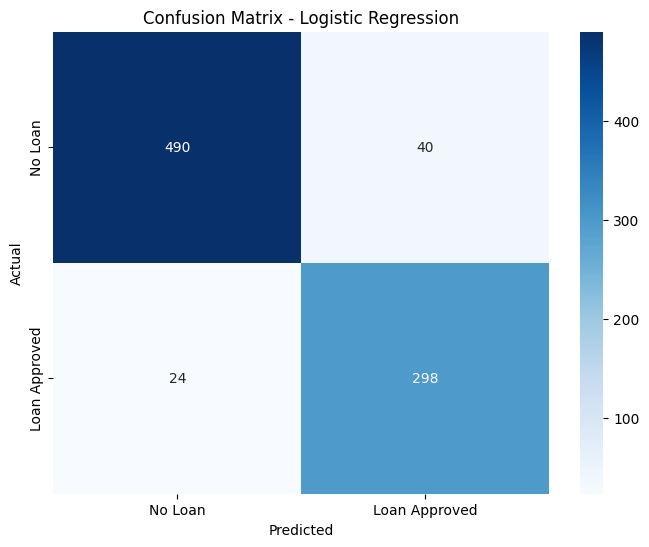

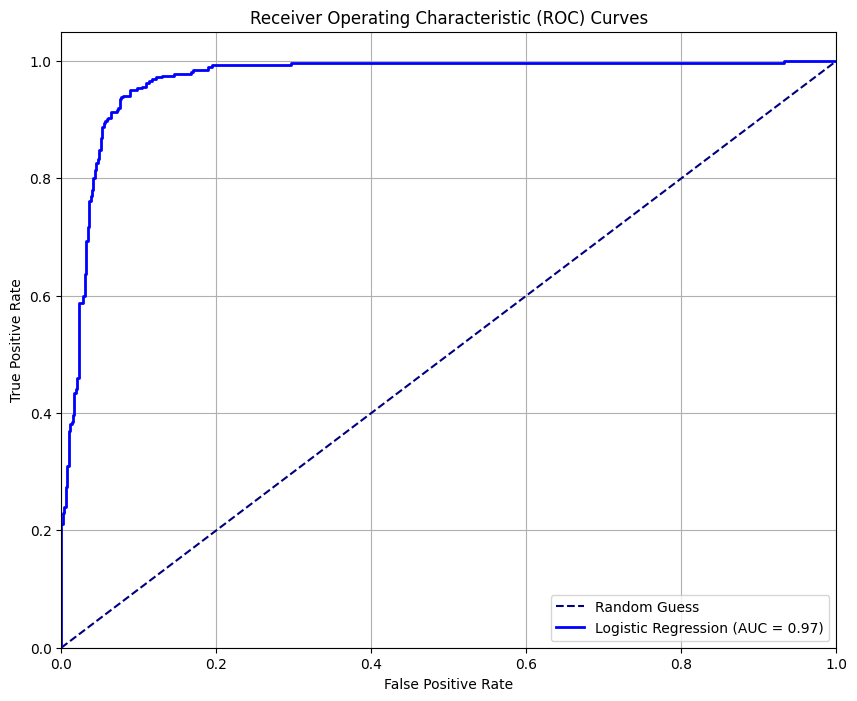

In [2025]:
#let's fit and predict using logistic regression as an initial run
X_train = X_resampled
y_train = y_resampled

logReg_model = LogisticRegression()
logReg_model.fit(X_train, y_train) #fit the model on the training data
logReg_predict_val = logReg_model.predict(X_test) #predict the values using the test data

log_accuracy, log_auc, log_f1_score = display_results(y_test, logReg_predict_val, "Logistic Regression", logReg_model, X_test)

The logisitic regression results are strong, as it resulted in an accuracy of 92.5%, an F1 Score of 90.3% and an ROC AUC score of 96.9%. In addition, the model will reject applicants accurately, as it has an average of 92% recall for rejected loan approvals. The same can be said for the case when the model handles accepted applicants. The high recall but slightly low precision average values indicate there may be a slight possibility that the model approves loan incorrectly, even though it mostly approves cases accurately, but this is really a minor result. Overall, these results indicate that this model is highly accurate, can handle false positives and negatives well, and can easily differentiate between positive and negative classes in this project, which is a binary classification problem.

Now, let's do the same for the random forest model.

Random Forest results

Accuracy Score: 0.9753521126760564

f1 score: 0.9673405909797823

ROC AUC: 0.997412984882222

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.98      0.98      0.98       530
    Approved       0.97      0.97      0.97       322

    accuracy                           0.98       852
   macro avg       0.97      0.97      0.97       852
weighted avg       0.98      0.98      0.98       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


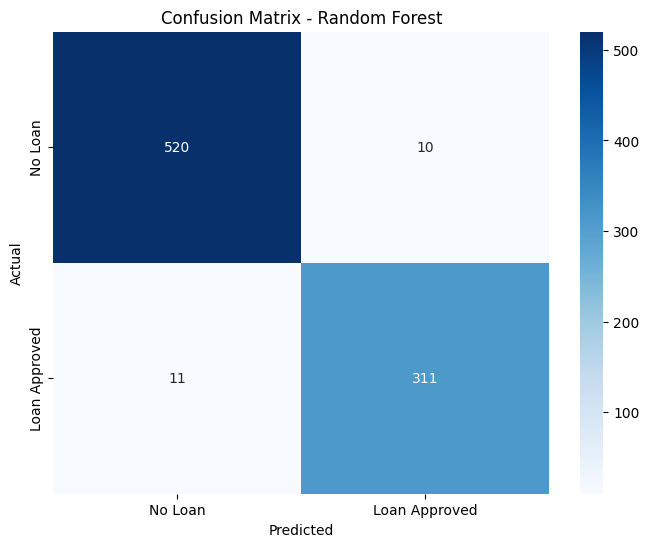

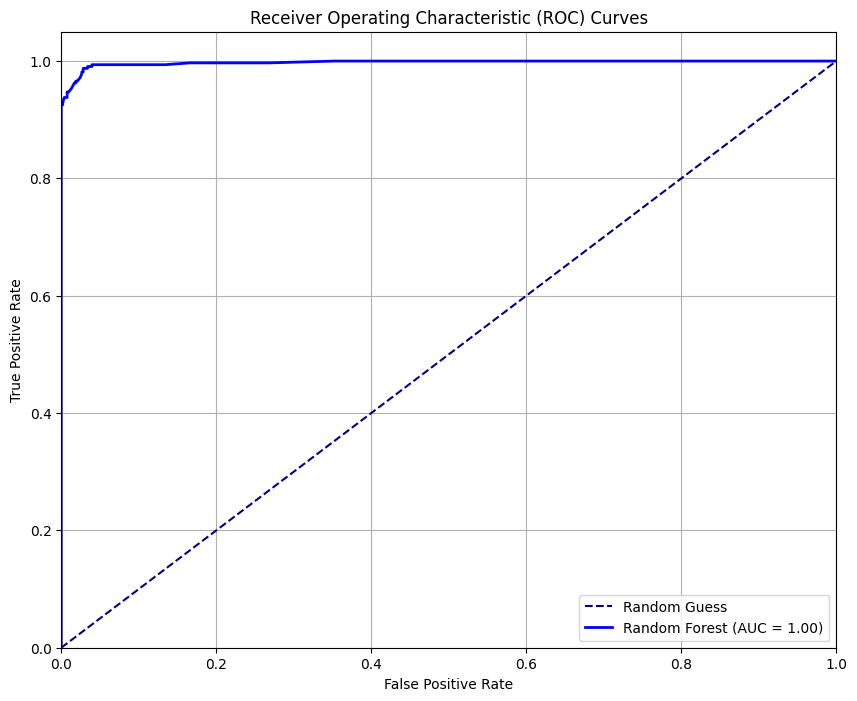

In [2026]:
#let's fit and predict using random forest as an initial run
randForest_model = RandomForestClassifier()
randForest_model.fit(X_train, y_train)
randForest_predict_val = randForest_model.predict(X_test)

rand_accuracy, rand_auc, rand_f1_score = display_results(y_test, randForest_predict_val, "Random Forest", randForest_model, X_test)

The results for the random forest model are in and not only are the results strong, they are even better than the logistic regression results.  This model produced an accuracy of 97.5%, an F1 score of 96.7% and a ROC AUC score of 99.8%.  In addition, based on the precision and recall values, this model rejects almost perfectly and is producing rare false positive (with precision and recall values of 98% and 98% respectively). The same can be said for the case when the model accepts applicants. This indicates that this model is highly and even more accurate than the last one, can handle false positives and negatives well, and can easily differentiate between positive and negative classes in this project.

Let's try the KNN model now.

KNN results

Accuracy Score: 0.8767605633802817

f1 score: 0.844903988183161

ROC AUC: 0.9541427399507794

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.93      0.87      0.90       530
    Approved       0.81      0.89      0.84       322

    accuracy                           0.88       852
   macro avg       0.87      0.88      0.87       852
weighted avg       0.88      0.88      0.88       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


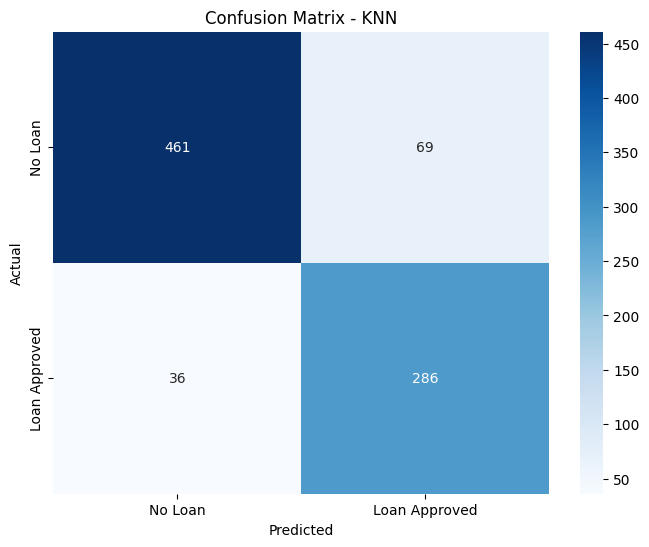

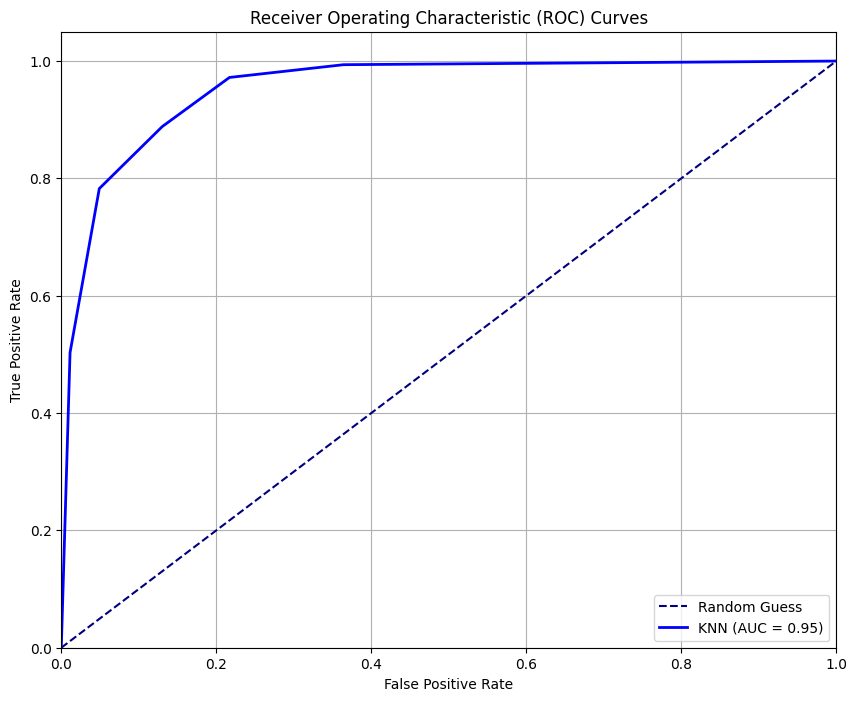

In [2027]:
#let's fit and predict using KNN as an initial run
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_model_val = knn_model.predict(X_test)

knn_accuracy, knn_auc, knn_f1_score = display_results(y_test, knn_model_val, "KNN", knn_model, X_test)

Based on the results, it is evident that while KNN did well overall, it did worse than the first 2 models, with an accuracy of 87.7%, an F1 score of 84.5% and a ROC AUC score of 95.4%. This is clearly lower than any other model we've done so far.  In addition, the precision values are quite different for both accepting and rejecting loans and both are lower than in the first 2 models. In addition, while the recall value is the same for both cases, they are also lower than previous recall values. This means that:

1. the model rejects loans easily, but may incorrectly reject loans it should not have, as it has a solid but weaker precision and recall rate.
2. the model accepts loans but there is quite a good chance it may accept loans it should not have, as it has an okay but weaker precision rate.

Overall, this model does reasonably ok, but is less accurate, may struggle to balance precision and recall more than in the two previous models, and doesn't distinguish positive and negative classes as well as the Logistic Regression and Random Forest models.

Finally, let's observe the results for the SVM model.

SVM results

Accuracy Score: 0.9424882629107981

f1 score: 0.9251908396946565

ROC AUC: 0.9808918317121762

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.96      0.94      0.95       530
    Approved       0.91      0.94      0.93       322

    accuracy                           0.94       852
   macro avg       0.94      0.94      0.94       852
weighted avg       0.94      0.94      0.94       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


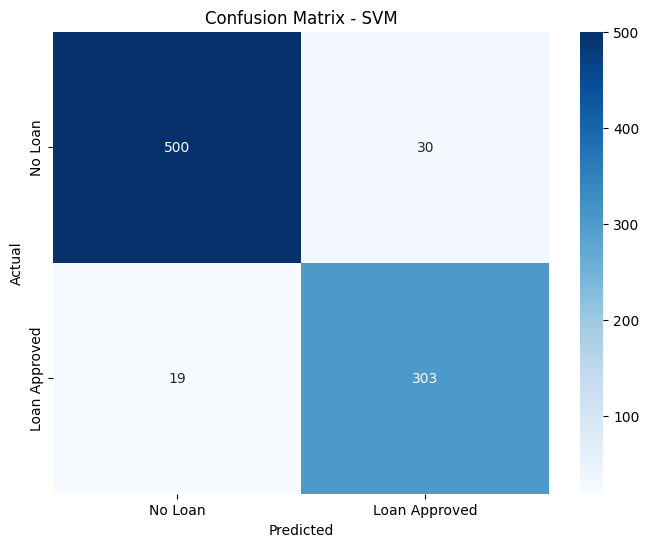

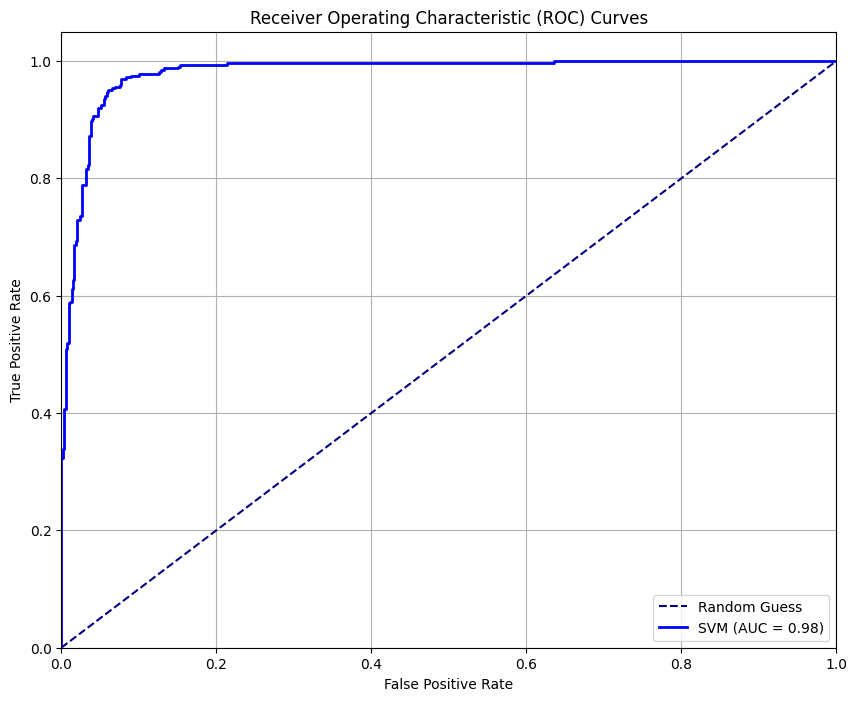

In [2028]:
#let's fit and predict using svm as an initial run
svm_model = sklearn.svm.SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_model_val = svm_model.predict(X_test)

svm_accuracy, svm_auc, svm_f1_score = display_results(y_test, svm_model_val, "SVM", svm_model, X_test)

The SVM results look great, as they do not reflect the average results we got for the KNN model. This model has an accuracy of 94.2%, a F1 score of 92.5% and a ROC AUC of 98.1%.  So this is roughly at the same level as the results from the Log Reg and Random forest model in terms of performance. When it comes to precision and recall, both cases of accepting and rejecting loans have the same recall value of 94%. In addition, both precision values, while a little different, are also very strong.  This means that the model rejects applicants very accurately with very few errors if at all, and the model does also accept applicants very accurately maybe with slightly more instance of errors where the loan was approved when it shouldn't be. Overall, this model is as good as the first 2 models we covered, as it is highly accurate, can balance false positives and negatives well, and can easily determine the difference between positive and negative classes.

In [2029]:
#display findings for baseline tests
model_results_regular = pd.DataFrame({
    'logistic regression': {'accuracy': log_accuracy, 'auc': log_auc, 'f1_score': log_f1_score},
    'random forest': {'accuracy': rand_accuracy, 'auc': rand_auc, 'f1_score': rand_f1_score},
    'knn': {'accuracy': knn_accuracy, 'auc': knn_auc, 'f1_score': knn_f1_score},
    'svm': {'accuracy': svm_accuracy, 'auc': svm_auc, 'f1_score': svm_f1_score}
}).T

model_results_regular

accuracy       auc  f1_score
logistic regression  0.924883  0.968651  0.903030
random forest        0.975352  0.997413  0.967341
knn                  0.876761  0.954143  0.844904
svm                  0.942488  0.980892  0.925191

Overall, not a bad start for the Logistic Regression, Random Forest, and KNN models, as they all had high performance results. However, the KNN performance was the worst with lower performance results and slightly higher change that the model would make errors when predicting. We'll see if it can improve in this next iteration like with other models. 

<span style="font-size: 16px;">Hyperparameter Tuning</span>

We will start our second iteration, which is to run all the models again but this time, we will use specific values of the parameters for each model. However, instead of coming up wth any parameter values, we will find which parameter values will optimize our performance for each model. Thus, we will conduct hyperparameter tuning for each model before running it again. 

We will start with the Logistic Regression model. The main parameters that it uses are:

1. C = parameter that manages the strength of the regularization penalty, a penalty that dictates how well it maps the data and prevents overfitting. Smaller values result in stronger regularization that may raise the chances of the model underfitting the data. The opposite case may result in overfitting.  

2. penalty = the type of regularization the model should use. There are 2 types: L1 and L2 regularization. L1 regularization prevents overfitting by removing unessecary features while L2 regularization also prevents overfitting by reducing large weights in the model. 

3. solver = an algorithm that finds the optimal model parameters. Since it is only solver for linear models, we'll only use liblinear.

So let's see what values we get for our parameters.

In [2030]:
#hyperparameter tuning for logistic regression
param_grid = {'C':[0.1, 0.5, 1, 5, 10, 50, 100],
              'penalty': ['l1', 'l2'], 
              'solver': ['liblinear']}

cv = StratifiedKFold(n_splits=5, shuffle=True) #create a stratified k-fold cross-validation object to ensure that each fold has the same proportion of classes as the entire dataset

logReg_grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv, scoring='roc_auc', verbose=0, n_jobs=-1) # create a grid search object to find the best hyperparameters for the logistic regression model using the specified parameter grid and cross-validation object

logReg_grid.fit(X_train, y_train)

best_params_logreg = logReg_grid.best_params_

c_value = best_params_logreg['C']

print("Best parameters for Logistic Regression:")
print(logReg_grid.best_params_)

Best parameters for Logistic Regression:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


Look's like the value of C should be 100 and we should use L1 regularization and the liblinear solver to try to get optimal performance. 

Logistic Regression (Tuned) results

Accuracy Score: 0.9225352112676056

f1 score: 0.9

ROC AUC: 0.9685632251259815

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.95      0.92      0.94       530
    Approved       0.88      0.92      0.90       322

    accuracy                           0.92       852
   macro avg       0.92      0.92      0.92       852
weighted avg       0.92      0.92      0.92       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


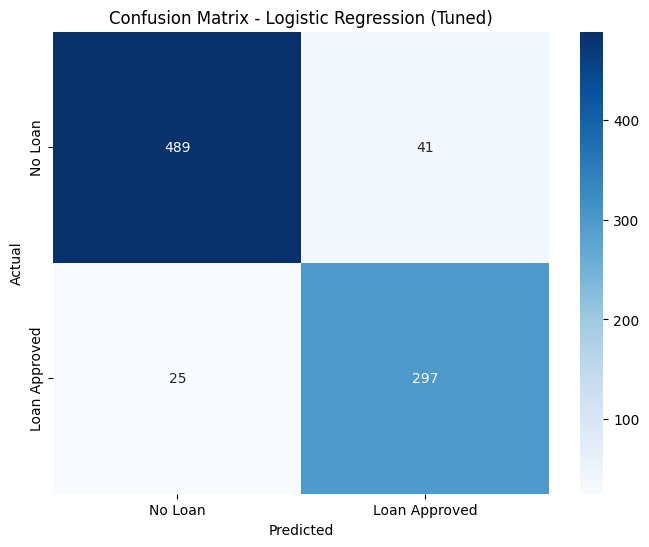

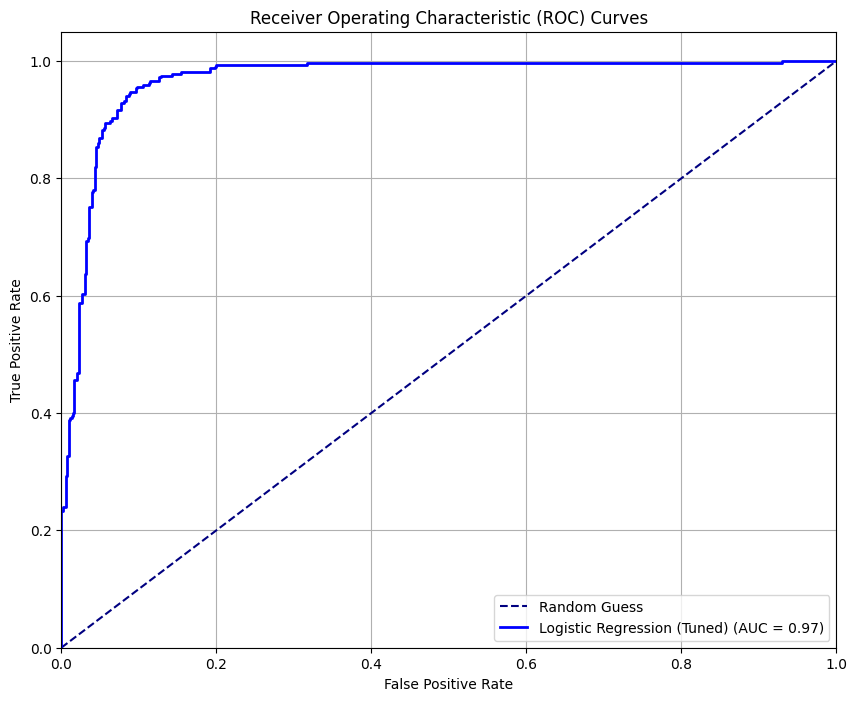

In [2031]:
logReg_model = LogisticRegression(C=best_params_logreg['C'], penalty=best_params_logreg['penalty'], solver=best_params_logreg['solver'])
logReg_model.fit(X_train, y_train)
logReg_predict_val = logReg_model.predict(X_test)

log_accuracy, log_auc, log_f1_score = display_results(y_test, logReg_predict_val, "Logistic Regression (Tuned)", logReg_model, X_test)

So looks like the model performance is still strong but it is slightly different.
1. Accuracy dropped from 92.5% -> 92.3%
2. F1 score dropped from 90.3% -> 90%
3. ROC AUC score stayed the same at 96.9% 

In addition, the precision and recall values are the same except for a slight decrease in the recall value for accepted loans (from 93% to 92%). This means that this hyperparameter tuning did not affect the precision or recall when identifying approved or rejected loans. So the model would perform this classification with the same level of accuracy. Overall, the tuning in general decrease the performance by a small amount, but not to a level that is concerning in my opinion.

So let's tune the random forest model now. Here are the parameters that we will tune:

1. n_estimators = the number of trees in this random forest model. More trees generally mean better performance
2. max_depth = the maximum depth of each tree. It can prevent overfitting by controlling how complex a tree can be
3. min_samples_split = the minimum number of samples that are needed to split a node. Usually a larger value of this parameter leads to less overfitting
4. min_samples_leaf = the minimum number of samples that are needed to be at a tree. Larger values of this parameter also may lead to less overfitting


So let's do something similar to what we did for the previous model to tune the model for the best parameter values.

In [2032]:
#hyperparameter tuning for KNN
param_grid_rf = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}


randomForest_grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=cv, scoring='roc_auc', verbose=0, n_jobs=-1)
randomForest_grid.fit(X_train, y_train)

best_params_rf = randomForest_grid.best_params_

print(f"Best Parameters for Random Forest: {best_params_rf}")


Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


So the best values for model optimization for random forest are:

1. max_depth = 30
2. min_samples_leaf = 2
3. min_samples_split = 2
4. n_estimators = 50

Now, let's use those values to train and test the random forest model.

Random Forest (Tuned) results

Accuracy Score: 0.9765258215962441

f1 score: 0.968944099378882

ROC AUC: 0.9972371967654986

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.98      0.98      0.98       530
    Approved       0.97      0.97      0.97       322

    accuracy                           0.98       852
   macro avg       0.98      0.98      0.98       852
weighted avg       0.98      0.98      0.98       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


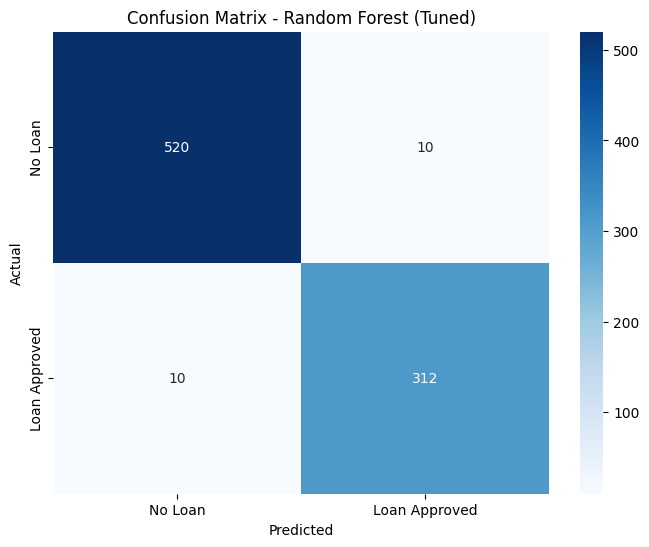

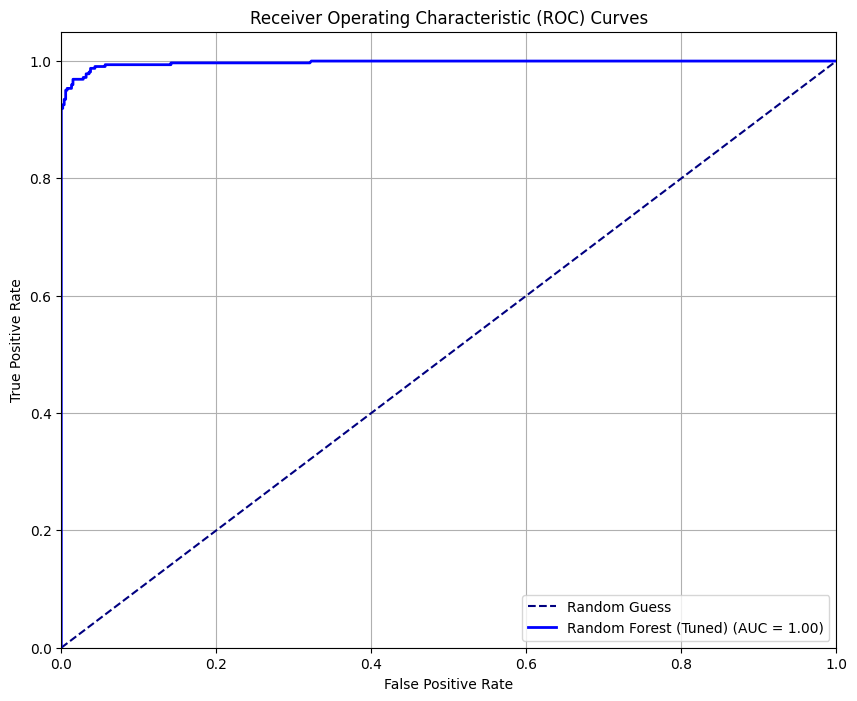

In [2033]:
randForest_model = RandomForestClassifier(max_depth=best_params_rf['max_depth'], min_samples_leaf=best_params_rf['min_samples_leaf'], min_samples_split=best_params_rf['min_samples_split'], n_estimators=best_params_rf['n_estimators'])
randForest_model.fit(X_train, y_train)
randForest_predict_val = randForest_model.predict(X_test)

rand_accuracy, rand_auc, rand_f1_score = display_results(y_test, randForest_predict_val, "Random Forest (Tuned)", randForest_model, X_test)

So the results are in.
1. Accuracy increased from 97.5% -> 97.7%
2. F1 Score increased from 96.7% -> 96.9%
3. ROC AUC Score stayed the same at 99.7% 

Thus, the tuning process did improve the performance slightly. Regarding the precision and recall values, they are exactly the same as they were without the tuning. Thus, this means that both versions of the model can approve or reject a loan with equal accuracy. This result shows that the hyperparameter tuning slightly improved the random forest model's performance and maintained accuracy of correctly approving or rejecting loan applications.

Now, let's tune the KNN model. Here are the following parameters to tune:
1. n_neighbors = the number of points nearest to a given point that the model will use to classify that point
2. weights = dictates the way each neighbor is treated when predicting a given data point
3. p = the type of distance formula to use to calculate the similarity between data points.

In [2034]:
#hyperparameter tuning for KNN
param_grid_knn = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  
}

knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=cv, scoring='roc_auc', verbose=0, n_jobs=-1)

knn_grid.fit(X_train, y_train)

best_params_knn = knn_grid.best_params_

print(f"Best Parameters for KNN: {best_params_knn}")


Best Parameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


So, in order to have the most optimal KNN model performance, according to the tuning:

1. n_neighbors should be 9
2. p should be 1
3. weights should be set to distance type (meaning neighbor points are weighted based on their distance from the targered data point)

We'll see what we get using these values.

KNN (Tuned) results

Accuracy Score: 0.8814553990610329

f1 score: 0.8508124076809453

ROC AUC: 0.9594222430563695

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.93      0.87      0.90       530
    Approved       0.81      0.89      0.85       322

    accuracy                           0.88       852
   macro avg       0.87      0.88      0.88       852
weighted avg       0.89      0.88      0.88       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


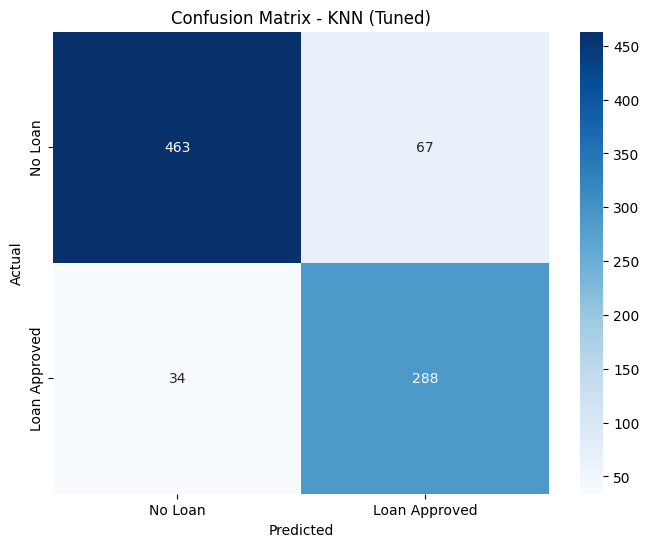

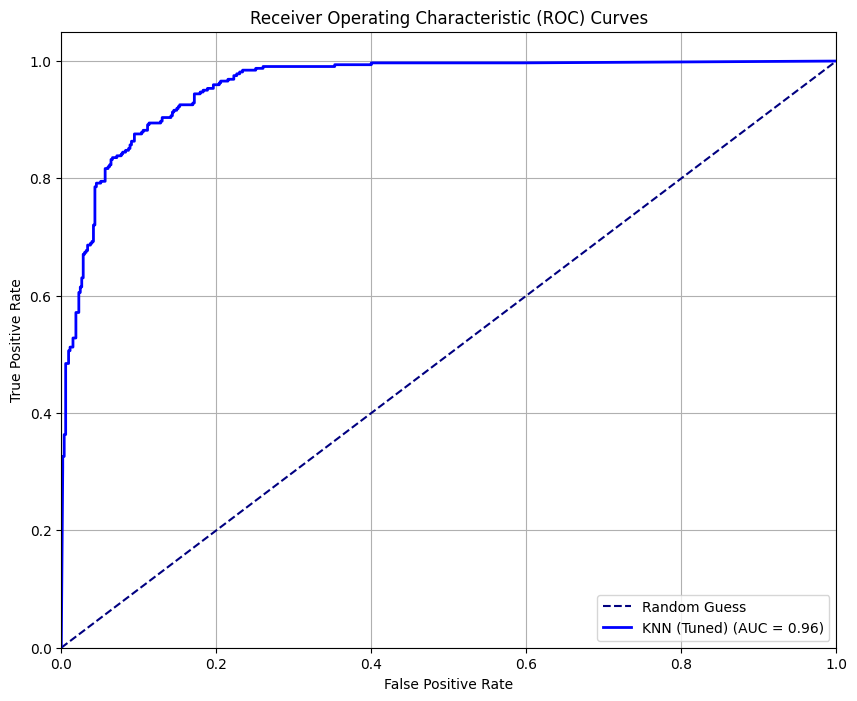

In [2035]:
knn_model = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'], weights=best_params_knn['weights'], p=best_params_knn['p'])
knn_model.fit(X_train, y_train)
knn_model_val = knn_model.predict(X_test)

knn_accuracy, knn_auc, knn_f1_score = display_results(y_test, knn_model_val, "KNN (Tuned)", knn_model, X_test)

So, it appears that the performance actually improved slightly:

1. Accuracy score rose from 87.7% to 88.1%
2. F1 score rose from 84.5% to 8.1%
3. ROC AUC score rose from 95.4% to 96%

In addition, like the result from the random forest model in this iteration, the precision and recall scores are exactly the same for both approved and rejected cases. So this KNN model slightly improved after tuning it and was able to maintain accuracy in identifying approved and rejected loans.

So let's finally tune the SVM model. The parameters to tune are:

1. C = the regularization parameter. It balances maximizing the margin and preventing or minimizing misclassifications. Larger values of C may cause overfitting, while smaller values may cause underfitting.
2. kernel = type of kernel, which dictates how data is transformed and processed in a higher dimensional space.
3. gamma = the metric that dictates to what extent training examples can influence the decision boundary.

In [2036]:
#hyperparameter tuning for SVM
param_grid_svm = {
        'C': [0.1, 1, 5, 10, 100],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 0.1, 1]
}

svm_grid = GridSearchCV(sklearn.svm.SVC(probability=True), param_grid=param_grid_svm, cv=cv, scoring='roc_auc', verbose=0, n_jobs=-1)

svm_grid.fit(X_train, y_train)

best_params_svm = svm_grid.best_params_

print(f"Best Parameters for SVM: {best_params_svm}")

Best Parameters for SVM: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


So the parameter values to get the most optimal performance are:

1. C = 100
2. gamma = 0.1
3. kernel should use the rbf kernel which is used in non linear regression and classification.

So, let's see how these parameters change the outcome of this model training and testing.

SVM (Tuned) results

Accuracy Score: 0.9495305164319249

f1 score: 0.9322834645669291

ROC AUC: 0.9899742177428805

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.95      0.97      0.96       530
    Approved       0.95      0.92      0.93       322

    accuracy                           0.95       852
   macro avg       0.95      0.94      0.95       852
weighted avg       0.95      0.95      0.95       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


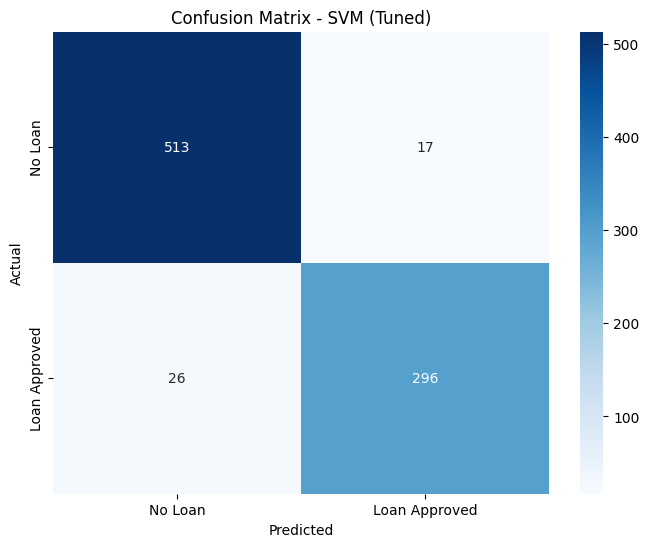

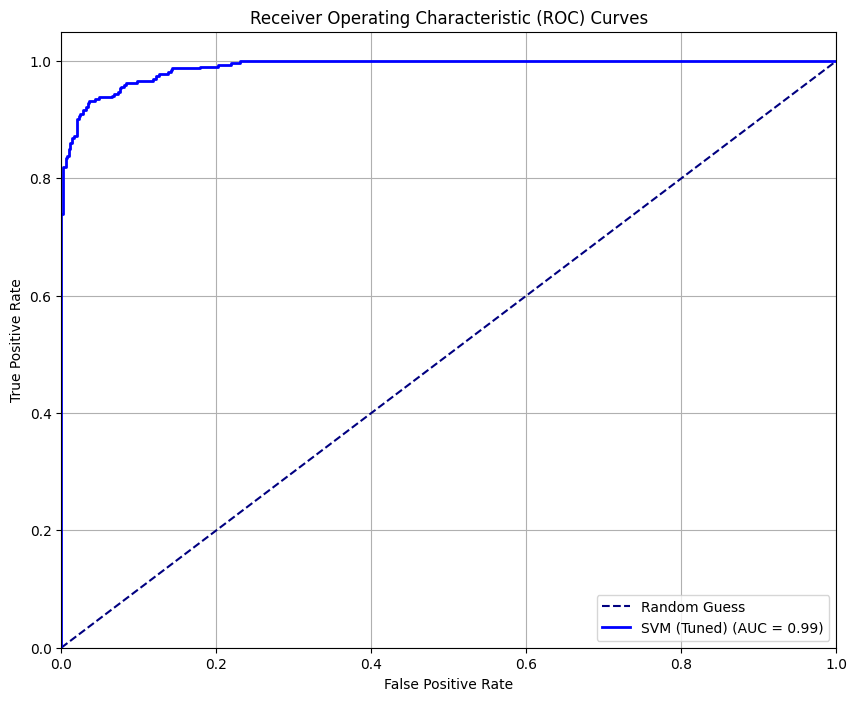

In [2037]:
svm_model = sklearn.svm.SVC(C=best_params_svm['C'], kernel=best_params_svm['kernel'], gamma=best_params_svm['gamma'], probability=True)
svm_model.fit(X_train, y_train)
svm_model_val = svm_model.predict(X_test)

svm_accuracy, svm_auc, svm_f1_score = display_results(y_test, svm_model_val, "SVM (Tuned)", svm_model, X_test)

It does look like it is also happening for the SVM model; the performance of this model has improved slightly.

1. Accuracy rose from 94.2% to 95%
2. F1 score rose from 92.5% to 93.2%
3. ROC AUC score rose from 98% to 99%

Unlike the previous 2 models in this iteration, the precision and recall values are different than what they were before we tuned them. Now, both precision values are the same and recall values are now different, which is different when we last trained this specific model (the recall values were same but precision values are different). This means that while it may not introduce false positives the tuning may have slightly increased the chances of the model failing to identify a false positive. So, overall, this model followed the other models in that performance improved and the precision and recall values indicate a small change in the effectiveness of case recognition.

In [2038]:
model_results_tuning = pd.DataFrame({
    'logistic regression': {'accuracy': log_accuracy, 'auc': log_auc, 'f1_score': log_f1_score},
    'random forest': {'accuracy': rand_accuracy, 'auc': rand_auc, 'f1_score': rand_f1_score},
    'knn': {'accuracy': knn_accuracy, 'auc': knn_auc, 'f1_score': knn_f1_score},
    'svm': {'accuracy': svm_accuracy, 'auc': svm_auc, 'f1_score': svm_f1_score},
}).T

model_results_tuning

accuracy       auc  f1_score
logistic regression  0.922535  0.968563  0.900000
random forest        0.976526  0.997237  0.968944
knn                  0.881455  0.959422  0.850812
svm                  0.949531  0.989974  0.932283

So overall, the performances in general improved across the board. Despite all this, the KNN model is still last in the 3 major metrics shown above. Let's see if that model in particular can improve even more to be within a good range with the performances of the other 3 models. 

<span style="font-size: 16px;">Feature Selection</span>

So far, we've tested all these models with default parameters and then we hypertuned them to get the parameters for optimal results. So far, we've seem improvement in performance, but I think it's good to go even further and see if we can make these models even more accurate. So, I believe the best approach at this point would be to consider looking at all input features and address any potential cases of collinearity or multi-collinearity.

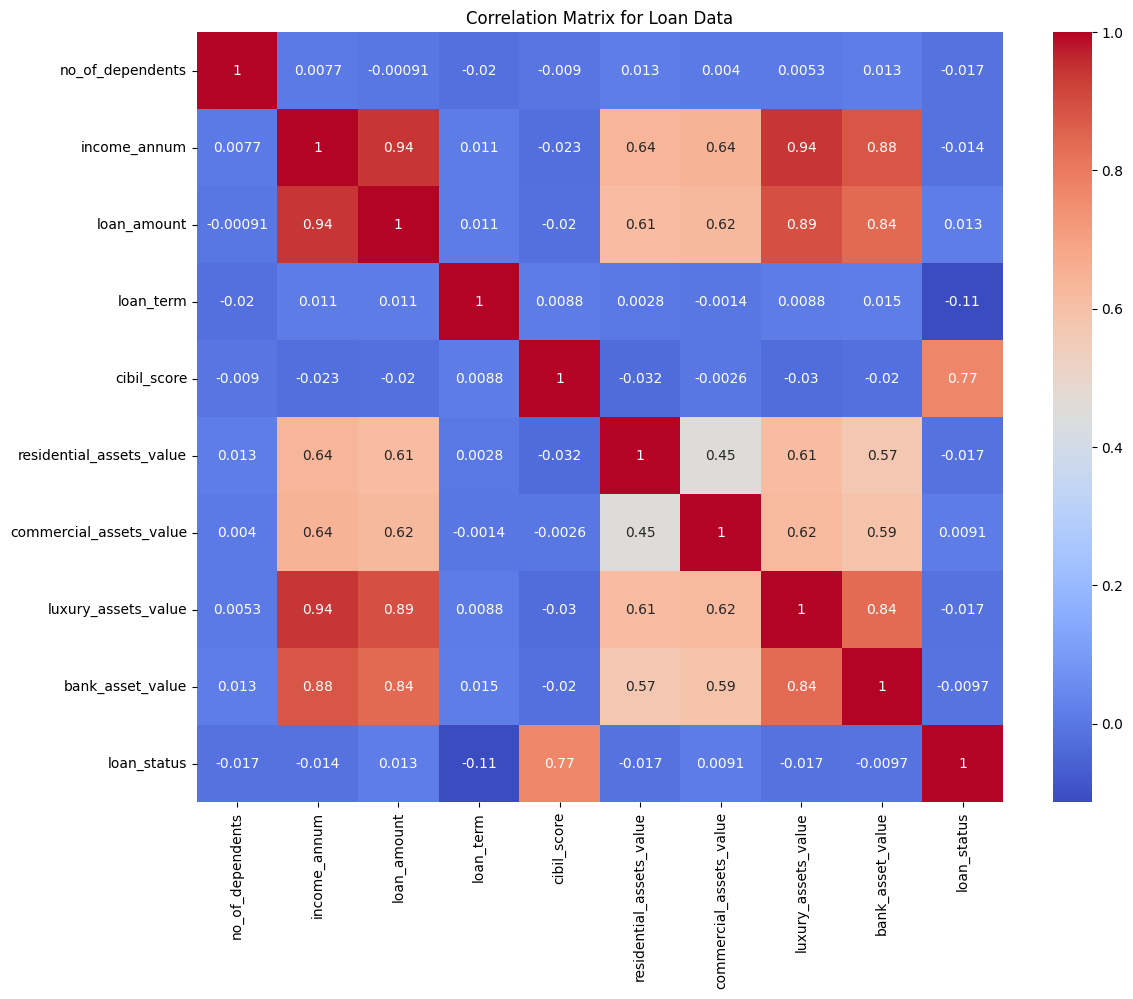

In [2039]:
cor = loan_data_copy.select_dtypes(include = ['int64', 'float64']).corr(method='spearman')
plt.figure(figsize=(13, 10))
sns.heatmap(cor, cmap = 'coolwarm', annot = True)
plt.title('Correlation Matrix for Loan Data')
plt.show()

This heatmap should be very similar as it is the same heatmap shown in the EDA section.  Looking at this heatmap, the most important cells we should be looking at would be the cells represented by input features that have very high correlation values. In this case, we see that the following cells have very high values:

1. income_annum vs luxury_asset_value with a value of 0.94
2. income_annum vs bank_asset_value with a value of 0.88
3. loan_amount vs luxury_asset_value with a value of 0.89
4. loan_amount vs bank_asset_value with a value of 0.84
5. income_annum vs loan_amount with a value of 0.94
6. luxury_asset_value vs bank_asset_value with a value of 0.84

These cells have extremely high values (as they are color coded by an increasingly reddish color). But more importantly, because the correlation values indicate how correlated these features are, these cells confirm that there are multiple instances of multi-collinearity. 

Multi-collinearity is an issue because this can cause redundancy in the data, which can negatively impact a model's performance. Higher values mean an increased redundency of data, so this means that we should drop most of the features represented in cells with such values. In this case, we should really drop all but one of of this list of features to retain:

1. income_annum
2. luxury_asset_value
3. bank_asset_value
4. loan_amount

I think this will mainly minimize noise and redundancy that the models may struggle with. 

On the other hand, we should also think about potential features to definitely keep in the training and testing sets. I think the best way to do this would be to look at the rightmost column only, as those cells only portray each input feature's relationship with loan_status. The higher the correlation value, the more influence it likely has in determining loan status in this case. Obviously, based on previous findings and really a conspicuous detail, cibil_score should definitely stay, having the highest value.  Since the signs (+, -) indicate relationship type and not value, I think it is reasonable to keep loan_term as well as one of the 4 features that were considered to be multicollinear. As you can see, I only suggested retaining 3 features. I think only having 3 features as the new dataset for this iteration will prevent overfitting. Thus, for this part, I'll only retain 3 features.    

To determine which features to keep, let's utilize the the list of most important features from the random forest model (randForest_model.feature_importances_). This will tell us how influential and predictive a feature is in determining loan_status. 

In [2040]:
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': randForest_model.feature_importances_
}).sort_values(by='Importance', ascending=False) #get the features ranked in order of importance and sort the values in descending order based on importance value

importance_df.reset_index(drop=True, inplace=True) #drop existing indices and update the reset the indices so that the highest importance feature is at the top with the first index

importance_df

Feature  Importance
0                cibil_score    0.830048
1                  loan_term    0.060185
2                loan_amount    0.023338
3   residential_assets_value    0.014105
4               income_annum    0.014037
5        luxury_assets_value    0.013837
6           bank_asset_value    0.013796
7    commercial_assets_value    0.012798
8           no_of_dependents    0.007192
9    education_ Not Graduate    0.005348
10        self_employed_ Yes    0.005317

So the list marks cibil_score and loan_term as the top features and loan_amount right below those two. This is consistent and does confirm my selections for which features to retain, as I picked the first 2 on this list and picked loan_amount, which was one of the four features that exhibited multi-collinearity. 

To start using it, we should just filter out all the other features not kept for both sets of X.

In [2041]:
#only retain the features: cibil_score, loan_term, and loan_amount and drop the rest by not including them in the new DataFrame
X_train_filtered = X_train[['cibil_score', 'loan_term', 'loan_amount']]
X_test_filtered = X_test[['cibil_score', 'loan_term', 'loan_amount']]

Now that we have filtered our training and testing data, let's use it in training and testing our models with the tuned parameters. Let's start with the logistic regression model.

Logistic Regression (Feature Selection + Tuned) results

Accuracy Score: 0.9225352112676056

f1 score: 0.9

ROC AUC: 0.9685456463143092

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.95      0.92      0.94       530
    Approved       0.88      0.92      0.90       322

    accuracy                           0.92       852
   macro avg       0.92      0.92      0.92       852
weighted avg       0.92      0.92      0.92       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


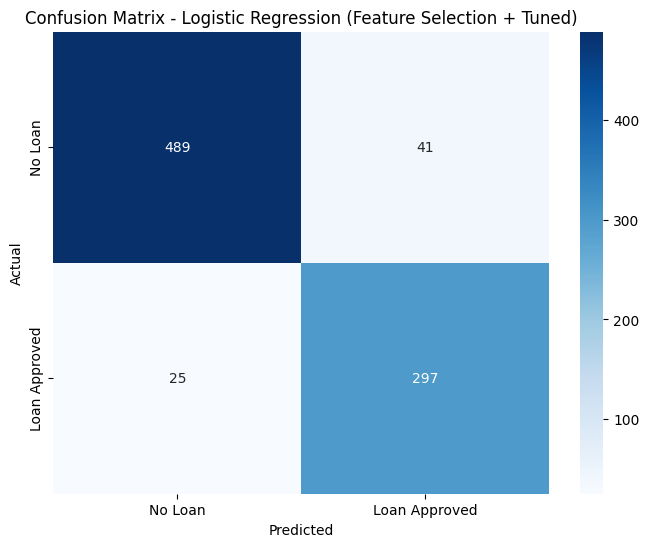

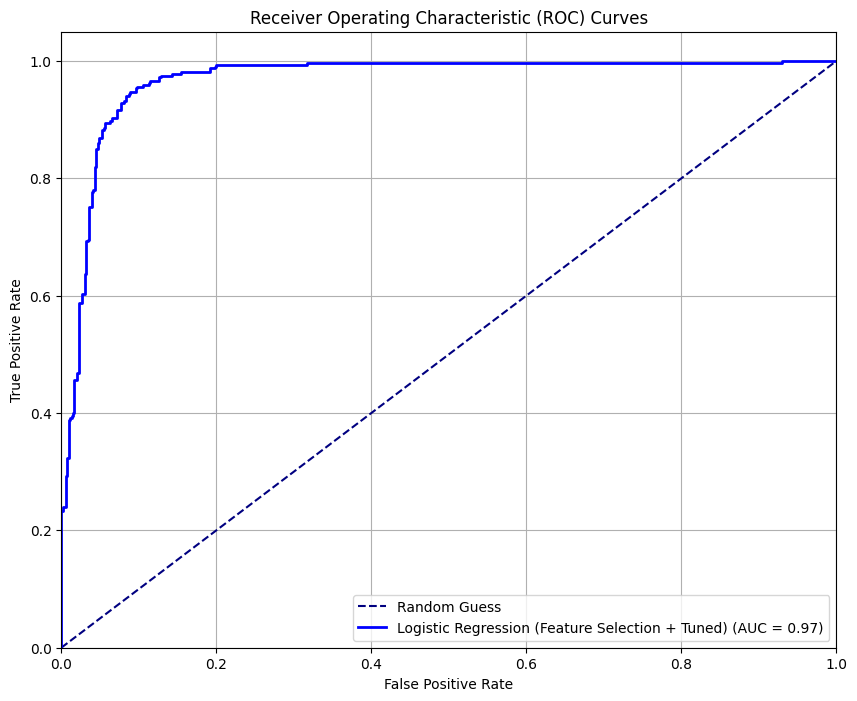

In [2042]:
logReg_model = LogisticRegression(C=best_params_logreg['C'], penalty=best_params_logreg['penalty'], solver=best_params_logreg['solver'])
logReg_model.fit(X_train_filtered, y_train)
logReg_predict_val = logReg_model.predict(X_test_filtered)

log_accuracy, log_auc, log_f1_score = display_results(y_test, logReg_predict_val, "Logistic Regression (Feature Selection + Tuned)", logReg_model, X_test_filtered)

Interesting. The performance for this model actually decreased slightly, except for ROC AUC Score:

1. Accuracy dropped from 92.5% to 92.3%
2. F1 Score dropped from 90.3% to 90%
3. ROC AUC Score stays the same at 96.9%

In fact, this performance results are the same as the performance for the baseline iteration (1st round).  In addition, the precision values are exactly the same as they were in the last iteration (tuning phase).  The recall values are almost the same, with the recall score for approved loans improved by 1%. But overall, this model seems to have performed almost exactly the same way as it did the first time.

Now, let's do the same for the random forest model.

Random Forest (Feature Selection + Tuned) results

Accuracy Score: 0.9753521126760564

f1 score: 0.9672386895475819

ROC AUC: 0.9980370326965897

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.98      0.98      0.98       530
    Approved       0.97      0.96      0.97       322

    accuracy                           0.98       852
   macro avg       0.97      0.97      0.97       852
weighted avg       0.98      0.98      0.98       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


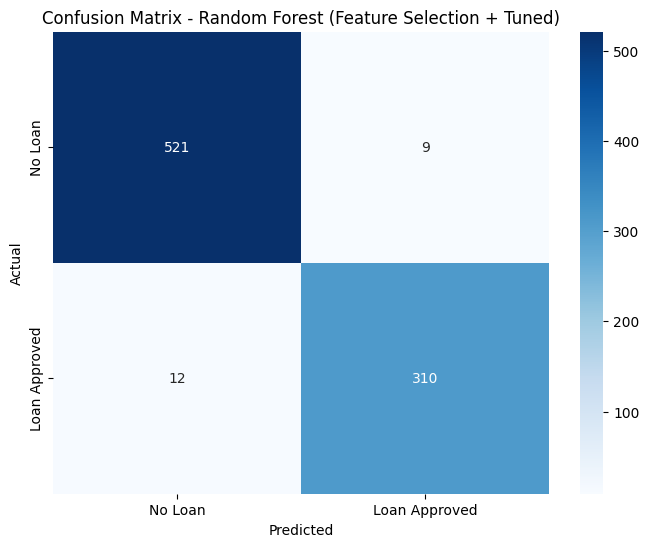

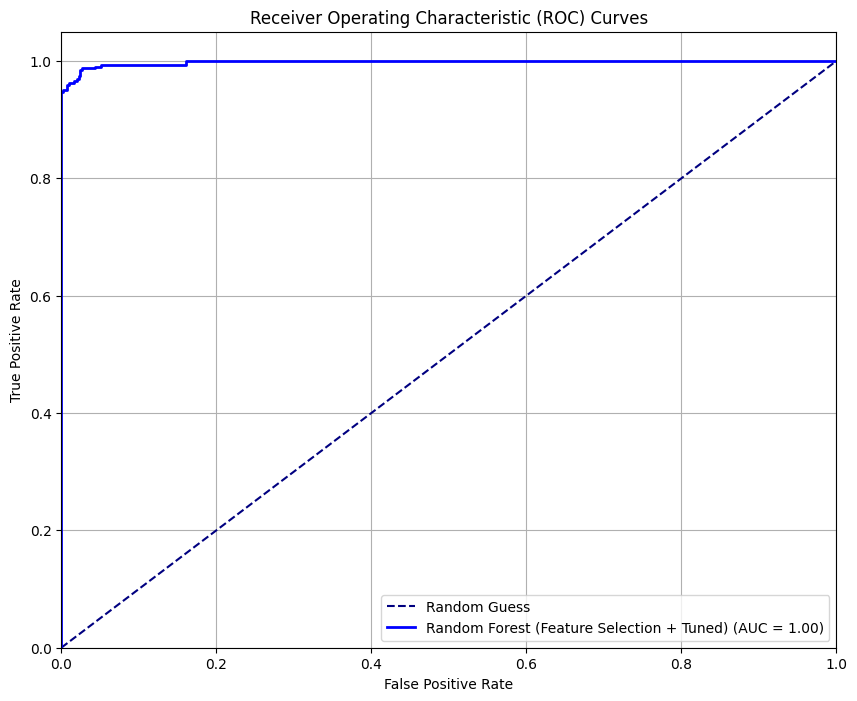

In [2043]:
randForest_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300)
randForest_model.fit(X_train_filtered, y_train)
randForest_predict_val = randForest_model.predict(X_test_filtered)

rand_accuracy, rand_auc, rand_f1_score = display_results(y_test, randForest_predict_val, "Random Forest (Feature Selection + Tuned)", randForest_model, X_test_filtered)

The results also show that the performance of this model also dropped (with exception to ROC AUC score) and the values are nearly identical to the result in the baseline iteration.

1. Accuracy dropped from 97.7% to 97.5%
2. F1 Score dropped from 96.9% to 96.7%
3. ROC AUC Score improved from 99.7% to 99.8%

Like the previous model in this iteration, the precision values are the same. The recall values are the same, except the recall value for approved loans increased by 1%.  Like the previous model, the performance of this model went up during the tuning iteration but went back to it's baseline performance in this iteration.

Let's analyze the KNN model now.

KNN (Feature Selection + Tuned) results

Accuracy Score: 0.8814553990610329

f1 score: 0.8508124076809453

ROC AUC: 0.9594222430563695

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.93      0.87      0.90       530
    Approved       0.81      0.89      0.85       322

    accuracy                           0.88       852
   macro avg       0.87      0.88      0.88       852
weighted avg       0.89      0.88      0.88       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


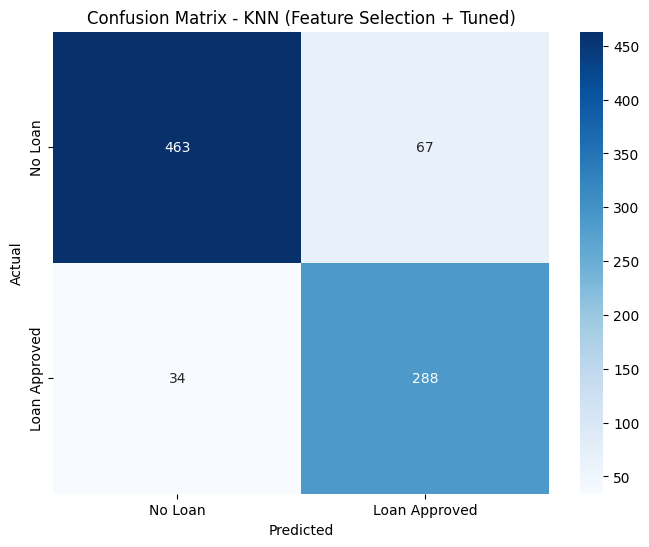

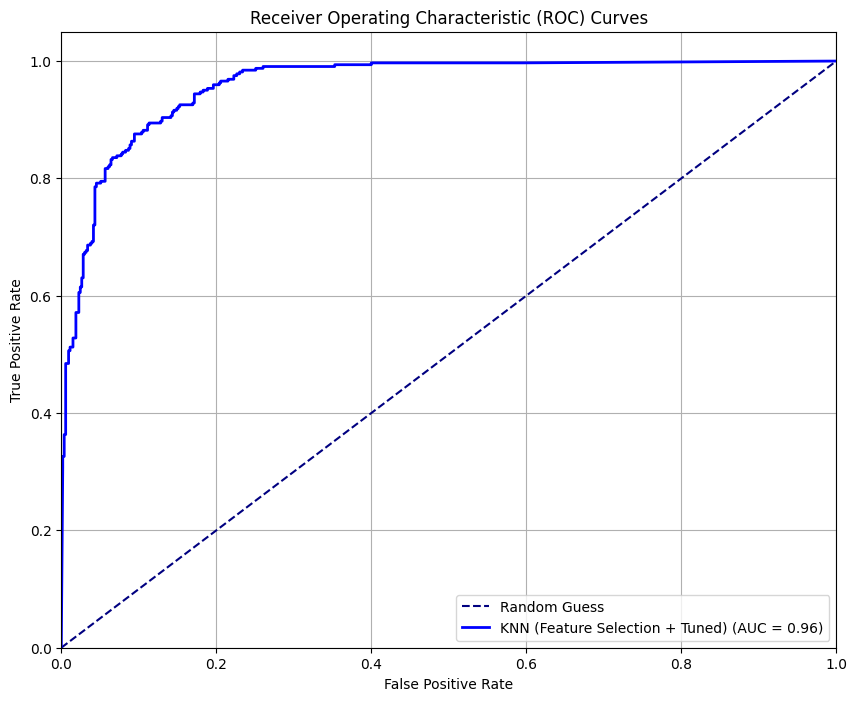

In [2044]:
knn_model = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'], weights=best_params_knn['weights'], p=best_params_knn['p'])
knn_model.fit(X_train_filtered, y_train)
knn_model_val = knn_model.predict(X_test_filtered)

knn_accuracy, knn_auc, knn_f1_score = display_results(y_test, knn_model_val, "KNN (Feature Selection + Tuned)", knn_model, X_test_filtered)

Very Interesting. Unlike the previous 2 models, the KNN model's performance seems to have stayed the same (and it's not the same results as the baseline iteration). 

1. Accuracy same at 88.1%
2. F1 Score same at 85.1%
3. ROC AUC Score same at 96%

In addition, the precision and recall values are exactly the same, which deviates from the performances of the 2 previous models a little bit because the recall values of the approved loans in those 2 models improved by 1%. 

Finally, let's take a look at the SVM model.

SVM (Feature Selection + Tuned) results

Accuracy Score: 0.9495305164319249

f1 score: 0.9322834645669291

ROC AUC: 0.9899742177428807

Classification Summary

              precision    recall  f1-score   support

    Rejected       0.95      0.97      0.96       530
    Approved       0.95      0.92      0.93       322

    accuracy                           0.95       852
   macro avg       0.95      0.94      0.95       852
weighted avg       0.95      0.95      0.95       852




/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test_numerical = y_test.replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)
/var/folders/3b/7k8tpsjs33zg87gp2v62y_6c0000gq/T/ipykernel_4829/3305548279.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  predict_val = pd.Series(predict_val).replace({' Approved': 0, ' Rejected': 1, '1': 1, '0': 0}).astype(int)


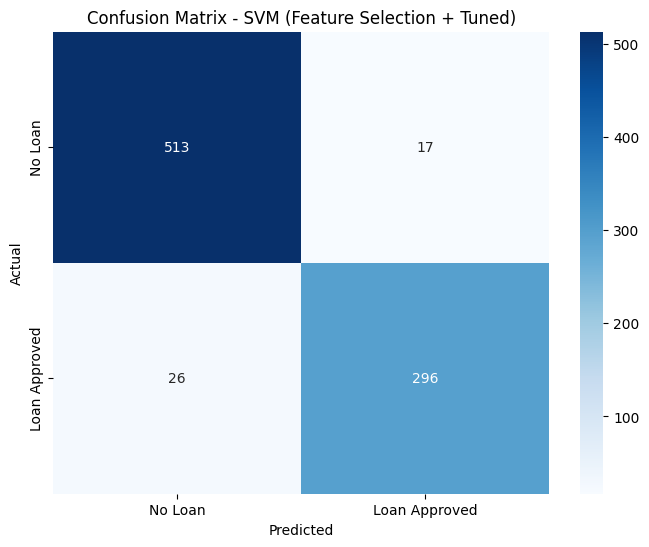

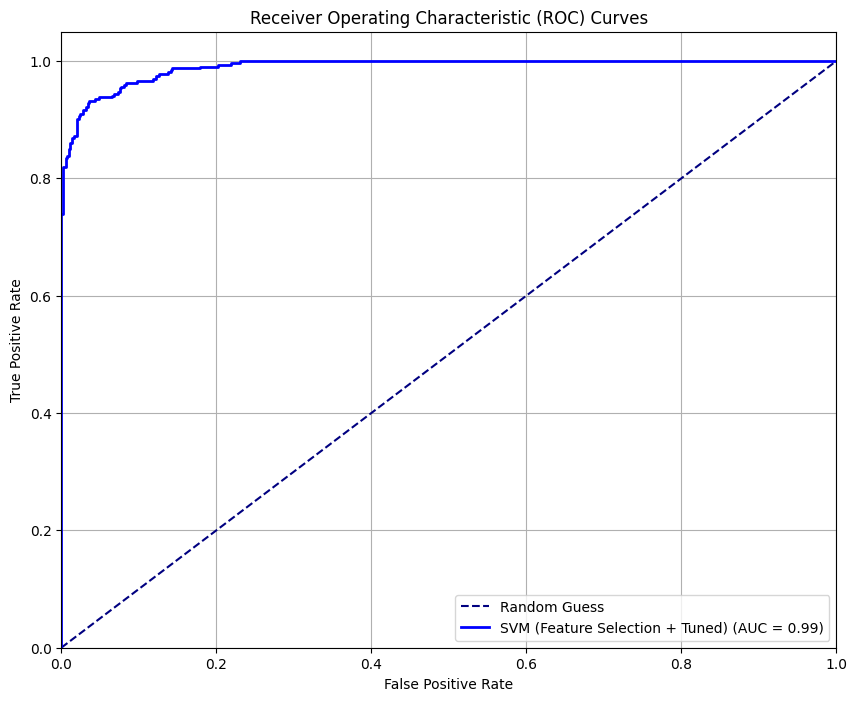

In [2045]:
svm_model = sklearn.svm.SVC(C=best_params_svm['C'], kernel=best_params_svm['kernel'], gamma=best_params_svm['gamma'], probability=True)
svm_model.fit(X_train_filtered, y_train)
svm_model_val = svm_model.predict(X_test_filtered)

svm_accuracy, svm_auc, svm_f1_score = display_results(y_test, svm_model_val, "SVM (Feature Selection + Tuned)", svm_model, X_test_filtered)

Also very interesting. The performance for this model, like in the previous model, showed the same performance as it did in the tuning phase (previous iteration).

1. Accuracy same at 95%
2. F1 Score same at 93.2%
3. ROC AUC Score same at 99%

Also, the precision and recall values are exactly the same as it was in the previous iteration. This model, like the KNN model, is clearly different than the first 2 models we have analyzed in that the feature selection doesn't seem to have changed the way and quality of their predictions. 

In [2046]:
model_results_fs = pd.DataFrame({
    'logistic regression': {'accuracy': log_accuracy, 'auc': log_auc, 'f1_score': log_f1_score},
    'random forest': {'accuracy': rand_accuracy, 'auc': rand_auc, 'f1_score': rand_f1_score},
    'knn': {'accuracy': knn_accuracy, 'auc': knn_auc, 'f1_score': knn_f1_score},
    'svm': {'accuracy': svm_accuracy, 'auc': svm_auc, 'f1_score': svm_f1_score},
}).T

model_results_fs

accuracy       auc  f1_score
logistic regression  0.922535  0.968546  0.900000
random forest        0.975352  0.998037  0.967239
knn                  0.881455  0.959422  0.850812
svm                  0.949531  0.989974  0.932283

Overall, in this final iteration, we only selected 3 features that we though impacted loan_status the most and the results we got were strange. For the Log Reg and Random Forest models, they appear to have gone back to performing the same way they did in the 1st iteration (baseline) but the results of the last 2 models (KNN and SVM) are the not the same as their 1st iteration results. In fact, they are the exact same results as in the previous (tuning) iteration. Despite all this, the KNN model is confirmed to be the worst performing model out of all the 4 models we've tried.

In [2047]:


total_model_results = pd.concat({
    'Regular': model_results_regular,
    'Tuning': model_results_tuning,
    'Feature Selection + Tuning': model_results_fs
}, axis=1)

total_model_results.T

logistic regression  random forest  \
Regular                    accuracy             0.924883       0.975352   
                           auc                  0.968651       0.997413   
                           f1_score             0.903030       0.967341   
Tuning                     accuracy             0.922535       0.976526   
                           auc                  0.968563       0.997237   
                           f1_score             0.900000       0.968944   
Feature Selection + Tuning accuracy             0.922535       0.975352   
                           auc                  0.968546       0.998037   
                           f1_score             0.900000       0.967239   

                                          knn       svm  
Regular                    accuracy  0.876761  0.942488  
                           auc       0.954143  0.980892  
                           f1_score  0.844904  0.925191  
Tuning                     accuracy  0.881455  0.949531  
                           auc       0.959422  0.989974  
                           f1_score  0.850812  0.932283  
Feature Selection + Tuning accuracy  0.881455  0.949531  
                           auc       0.959422  0.989974  
                           f1_score  0.850812  0.932283

So here is a general summary of all the results we've gotten from all 4 models for all 3 iterations that we did (baseline -> hyperparameter tuning -> feature selection) and we measured the accuracy, f1 score, and ROC AUC score. 

1. The results for the Logistic Regression were a bit different than the rest of the other models in that it was the only model that saw its performance drop slightly after the hyperparameter tuning phase but then not see its performance change at all after the final (feature selection) phase. The only exception is that ROC AUC score stayed the same throughout all 3 iterations. Here's how it's accuracy and F1 score changed over the 3 iterations:

    a. accuracy: 92.5% -> 92.3% -> 92.3%<br>
    b. F1 score: 90.3% -> 90% -> 90% <br>
    c. ROC AUC: constant

2. KNN and SVM interestingly have an identical performance trend. Their performances improved slightly when they underwent hyperparameter tuning but their performances plateaued after the the final iteration. Here's how their accuracy scores, F1 scores, and ROC AUC scores changed over the 3 iterations:

    a. For KNN: <br>
            -(accuracy: 87.7% f1 score: 84.5%, ROC AUC score: 95.4%) -> (accuracy: 88.1% f1 score: 85%, ROC AUC score: 96%) -> (accuracy: 88.1% f1 score: 85%, ROC AUC score: 96%) <br>
    a. For SVM: <br>
            - (accuracy: 94.2% f1 score: 92.5%, ROC AUC score: 98%) -> (accuracy: 95% f1 score: 93.2%, ROC AUC score: 99%) -> (accuracy: 95% f1 score: 93.2%, ROC AUC score: 99%) <br>

3. Random Forest has a unique performance trajectory out of the four models. Instead of increasing or decreasing the performance after the hyperparameter tuning and not changing the performance after the feature selection iteration, this performance of the model slightly improved after the hyperparameter tuning phase but decreased slightly with nearly an identical performance as it had in the baseline iteration. This is true for the accuracy and f1 scores but not with ROC Auc scores, which first dipped after the hyperparameter tuning, but improved slightly after feature selection phase. It doesn't exhibit an upward slope if you were to plot this on a graph; it would showcase a peak in the graph since the performance drops to what it was after the first iteration after the feature selection phase.

    a. accuracy: 97.5% -> 97.7% -> 97.5% <br>
    b. f1 score: 96.7% -> 96.9% -> 96.7% <br>
    c. ROC AUC: mainly constant

Overall, based on these performance results, the Random Forest model had the highest performance out of all the 4 models, with an average accuracy of 97.5%, as well as having an average f1 score and ROC AUC score of 96.7% and 99.7% respectively. The KNN model, however, had the worst performance out of all the 4 models, with the lowest average accuracy of 88%, average f1 score of 84.9% and an average ROC AUC score of 95.7%. The Random Forest model was the most effective model for this project. The SVM and Logistic Regression models also performed well, but failed to improve their performance after the feature selection phase. But the KNN model was the least effective and struggled to perform as well as the other models in all 3 iterations of this project.

<div style="font-size: 20px;">Discussion and Conclusion</div>

So, now I would like to end this project by discussing and analyzing in more depth the performances of these models, as well as concluding this project to wrap up. So the goal of this project was to come up with a model that would predict whether a loan application would be accepted and rejected, using the applicant's financial and personal information.  

As we concluded in the last section, the Random Forest model performed the best out of all the 4 models. The reason is because it is able to manage and model relationships that are complex as well as manage non-linearity. Random Forest models are ensemble methods that create many decision trees and group their outputs. This allows it learn about non linear relationships between features in the data. In addition, it is very robust to outliers in the data and is not negatively affected by feature scaling in the data, unlike other models that rely on distance calculations or more linear and clear relationships to determine similarity.  Thus, it is well suited for datasets like this one that have relationships between input features. The next best model is the Support Vector Machine (SVM) because it is effective in dividing the classes (accepted and rejected loans) by identifying an optimal decision boundary between them.  This is evident by the high ROC AUC scores in all three iterations, as it was able to identify which loans should be approved or rejected correctly. The next best model is Logistic Regression because while it maintains simplicity and is easy to interpret, it mainly assumes that there will always be linear relationships between input and target features. Since the dataset did not seem to be showing any linear relationships, this is why the model had slightly worse performance than the random forest model and the SVM model.  Now, the last model that worked best was the KNN model. The reasons why it may have performed the worst is that it is very sensitive to scaled data via feature scaling. This models mainly focuses on distance calculations to determine classification and so it may not work as well when compared to other models that can manage and utilize unscaled data.  In addition, since there were a lot of features that the model had to consider, it raised what we call the curse of dimensionality, a condition which causes models to struggle to find patterns in the data due to large amounts of features, and thus have poor accuracy.  Finally, this model learns on the training data and just uses that information only to predict the testing data, which is ineffective if there are non-linear relationships between features.     

Now, I would like to address some things that didn't work out in this project:

1. One thing that I noticed is that the hyperparameter tuning didn't have notable gains and it sometimes caused the models' performances to slightly drop. This reason why this happened is that while tuning helps the models to fit the data better, the degree of improvement relies on how flexible the model is as well as how complex the dataset is. If the model is limited (like logistic regression or KNN that can't identify non-linear relationships) or if the data has relationships that are non-linear or too complex, then it won't improve as much and may even drop depending on the model's flexibility and the parameter values after tuning.  
2. Random Forest, the best performing model out of all four models, had an unexpected trend in performance. Instead of continously improving, its performance peaked during tuning but dropped after feature selection with the same performance as in the baseline iteration.  The most likely reason why this happened is because these models automatically perform feature selection internally.  It does this by selecting the most important features that it identifies to split trees. It could be that some of the features we removed are actually useful and that is what caused a slight drop in performance as the model had less information to use. In addition, this model benefits with datasets with diverse features, as it can generate trees with unique features. Thus, removing those features makes the trees less diverse and can affect the accuracy of the model.
3. Logistic Regression, the 3rd best model in my opinion, had their performances drop slightly after the tuning iteration. This may have happened because the default parameter values we used in the baseline iteration didn't overfit the data as much as we thought they was going to. Thus, by tuning the parameter values, it simplied the model too much that it struggled to find complex patterns in the data, which lead to a slight decrease in accuracy overall.  

Now, after doing these tests with these models, there are some things that I've learned about (or took away) while working on this project:

1. This one is quite evident based on the performances of the models and why KNN and Logistic Regression models were the worst performing models: simple models, like KNN and Logistic Regression, need to have well engineered features in order for it to perform well and be more flexible with any kind of data. The reason why KNN and Logistic Regression models failed was because they were too limited in their functionality to find non-linear and complex relationships, causing them to struggle to identify patterns resulting in low accuracies.  On the other hand, SVM and Random Forest models had functionalities had could both handle noise in the data and identify non-linear and complex relationships. This enabled them to find patterns that helped them fit the data better and classify loan outcomes more accurately. This overall emphasizes the importance of selecting models that align with the complexity of the dataset and the problem it's associated with. 
2. Another lesson or takeway to be realized is that hyperparameter tuning does not always lead to an increase in model performance.  It really depends on the nature of the model as well as previous testing iterations that have been previously done. For example, model complexity can impact the tuning performance as models that are limited in identifying relationships, such as KNN, may not be able to further find more useful relationships with parameter values that are deemed optimal. In addition, sometimes it could be that the parameters we use for the models in the previous iterations are already optimal and do not lead of overfitting. So if you try to tune the model more, it will cause the model to become more simpler, which makes it less effective in identifying patterns and classify cases accurately. 
3. Also, it is important that the accuracy score should not be the only metric to use when determining the performance of a model.  F1 score, ROC AUC score (area under the AOC curve), and precision and recall values are also important metrics to consider in any evaluation.  Accuracy is simply the proportion of correct predictions over the total amount of predictions made. It does not tell you about the effectiveness of the models, especially in individual classes. A model may have a high accuracy in identifying loans that are approved but may completely fail to identify loans that should be rejected.  Thus, metrics like F1 score and ROC AUC score, need to be used to see the degree in which the model is working effectively not just in the big picture, but also in the individual cases as well to ensure that both classes are being classified accurately. Accuracy just tells you one side of the story.

Finally, there are some things I could have done to improve this project.

1. I may have hinted at this when discussing my takeways/learnings from this project, but I could have used more advanced models that were more aligned to my dataset to see if I could get even better performance results. These models would likely be tree based models because the Random Forest model, a tree based model, performed the best with this dataset. So it would make sense to try to get even better results by testing those kinds of models.  Some examples of models I could've used are Gradient Boosting, XGBoost, and LightGBM.  Looking back, I guess the addition of the KNN model was not the best move I made, but I'm confident that the addition of these models will give us an even better performance.
2. I probably should have done more feature engineering before the model selection by creating new numerical features. I believe the addition of new numerical features could help  weaker models such as KNN to find patterns in the data easier and therefore, perform more accurately. Some examples of features I could have added were a ratio comparing the amount of a loan to an applicant's total asset value and the average income of dependents if the applicants have dependents. 